<a href="https://colab.research.google.com/github/nisha432/netflix/blob/main/Netflix_Unsupervised_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>







# **Project Name**    -



##### **Project Type**    - Unsupervised/Netflix
##### **Contribution**    - Individual
**Team Member 1**         - Nisha Ahire


# **Project Summary -**

Based on the analysis of the dataset, we found that approximately 30.9% of the content on Netflix consists of TV shows, while the remaining 69.1% is dedicated to movies. This distribution suggests that there is a higher production of movies compared to TV shows. Several factors could contribute to this observation, including viewer preferences, the availability of diverse movie content, the time-consuming nature of producing TV shows, and other considerations. These insights provide valuable context for understanding the content landscape on Netflix and the emphasis placed on different types of programming.

Furthermore, we discovered that the United States has the highest number of content on Netflix, followed by India. Over the years, there has been an increase in content additions, with peak years in 2019 for movies and 2020 for TV shows. However, there has been a decline in content additions afterward.

The most common rating for both movies and TV shows on Netflix is "TV-MA." The top genres vary across different categories. In general, international movies, dramas, and comedies are popular. For TV shows, the top genres are kids' TV, international TV shows, and dramas. In movies, the top genres include documentaries, stand-up comedy, dramas, and international movies.

Examining the number of releases, we observed a consistent increase since 2001, reaching the highest number of releases in 2018. In TV shows, the release count has been increasing each year, peaking in 2020. For movies, the release year peaked in 2017, followed by a steady increase until 2016, a slight fall in 2018, and a significant decline in 2019 and 2020.

In terms of actors, Anupam Kher emerged as the top actor on Netflix, followed by Takahiro Sakurai and Shahrukh Khan. Notably, several Indian actors are among the top 10 actors, highlighting their popularity and presence in Netflix movies. Among the top directors for TV shows on Netflix are Alastair Fothergill, Shin Won-ho, and Iginio Straffi, while for movies, directors like Raúl Campos, Jan Suter, Marcus Raboy, and Jay Karas stand out.

The insights gained from this analysis have the potential to positively impact Netflix's business. They can help identify opportunities for recognition, collaborations, and engaging viewers. However, there are risks associated with dependency on specific directors and not adapting to changing trends. To mitigate these risks and sustain positive growth, Netflix should strive for a balanced approach, conduct market research, and maintain strong relationships with directors.

Regarding the clustering analysis, we tested seven different models, including k-means, silhouette score analysis, dendrogram, DBSCAN, affinity propagation, spectral clustering, and Gaussian mixture model. Based on the results, the optimal cluster was identified as cluster 2, with a silhouette score of 0.6514, which indicates good clustering performance. Further details and insights can be provided based on the specific clustering algorithm used and the interpretation of the clustering results.

# **GitHub Link -**

https://github.com/nisha432/netflix/blob/main/Netflix_Unsupervised_.ipynb

# **Problem Statement**


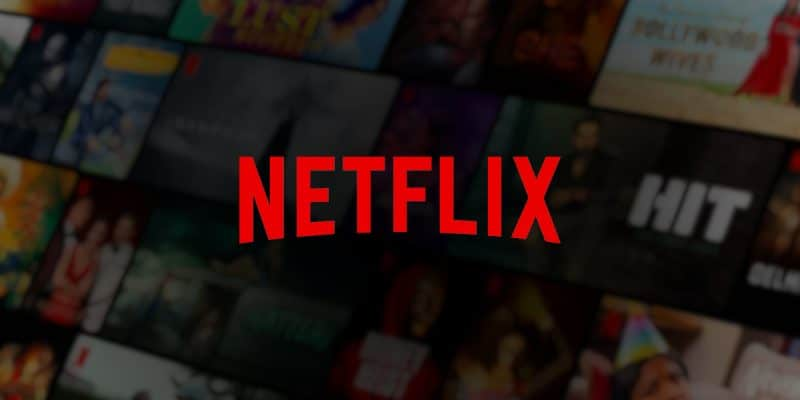

The problem at hand is to perform clustering on a dataset containing information about Netflix shows and movies. The dataset includes various attributes such as genre, release year, ratings, and duration. The goal is to group similar shows and movies together based on these attributes, without the use of any pre-existing labels or target variables.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [143]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import missingno as msno
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import plotly.graph_objects as go
from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal
import matplotlib.patheffects as path_effects
!pip install kaleido

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [144]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [146]:
# Dataset First Look
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


### Dataset Rows & Columns count

In [147]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

there are 7787 rows and 12 columns

### Dataset Information

In [148]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [149]:
# Find duplicate rows based on all columns
duplicates =data[data.duplicated()]

# Print the duplicate rows
print(duplicates)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


In [150]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Length: 7787, dtype: bool

In [151]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [152]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

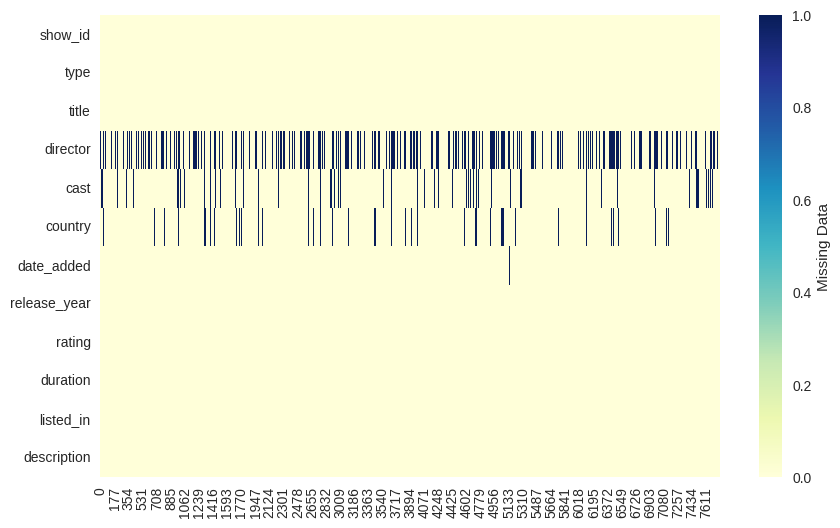

In [153]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<Figure size 1000x600 with 0 Axes>

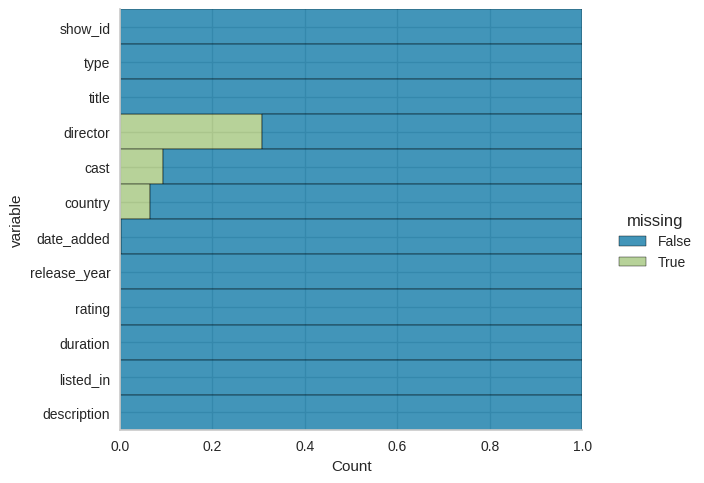

In [154]:
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Axes: >

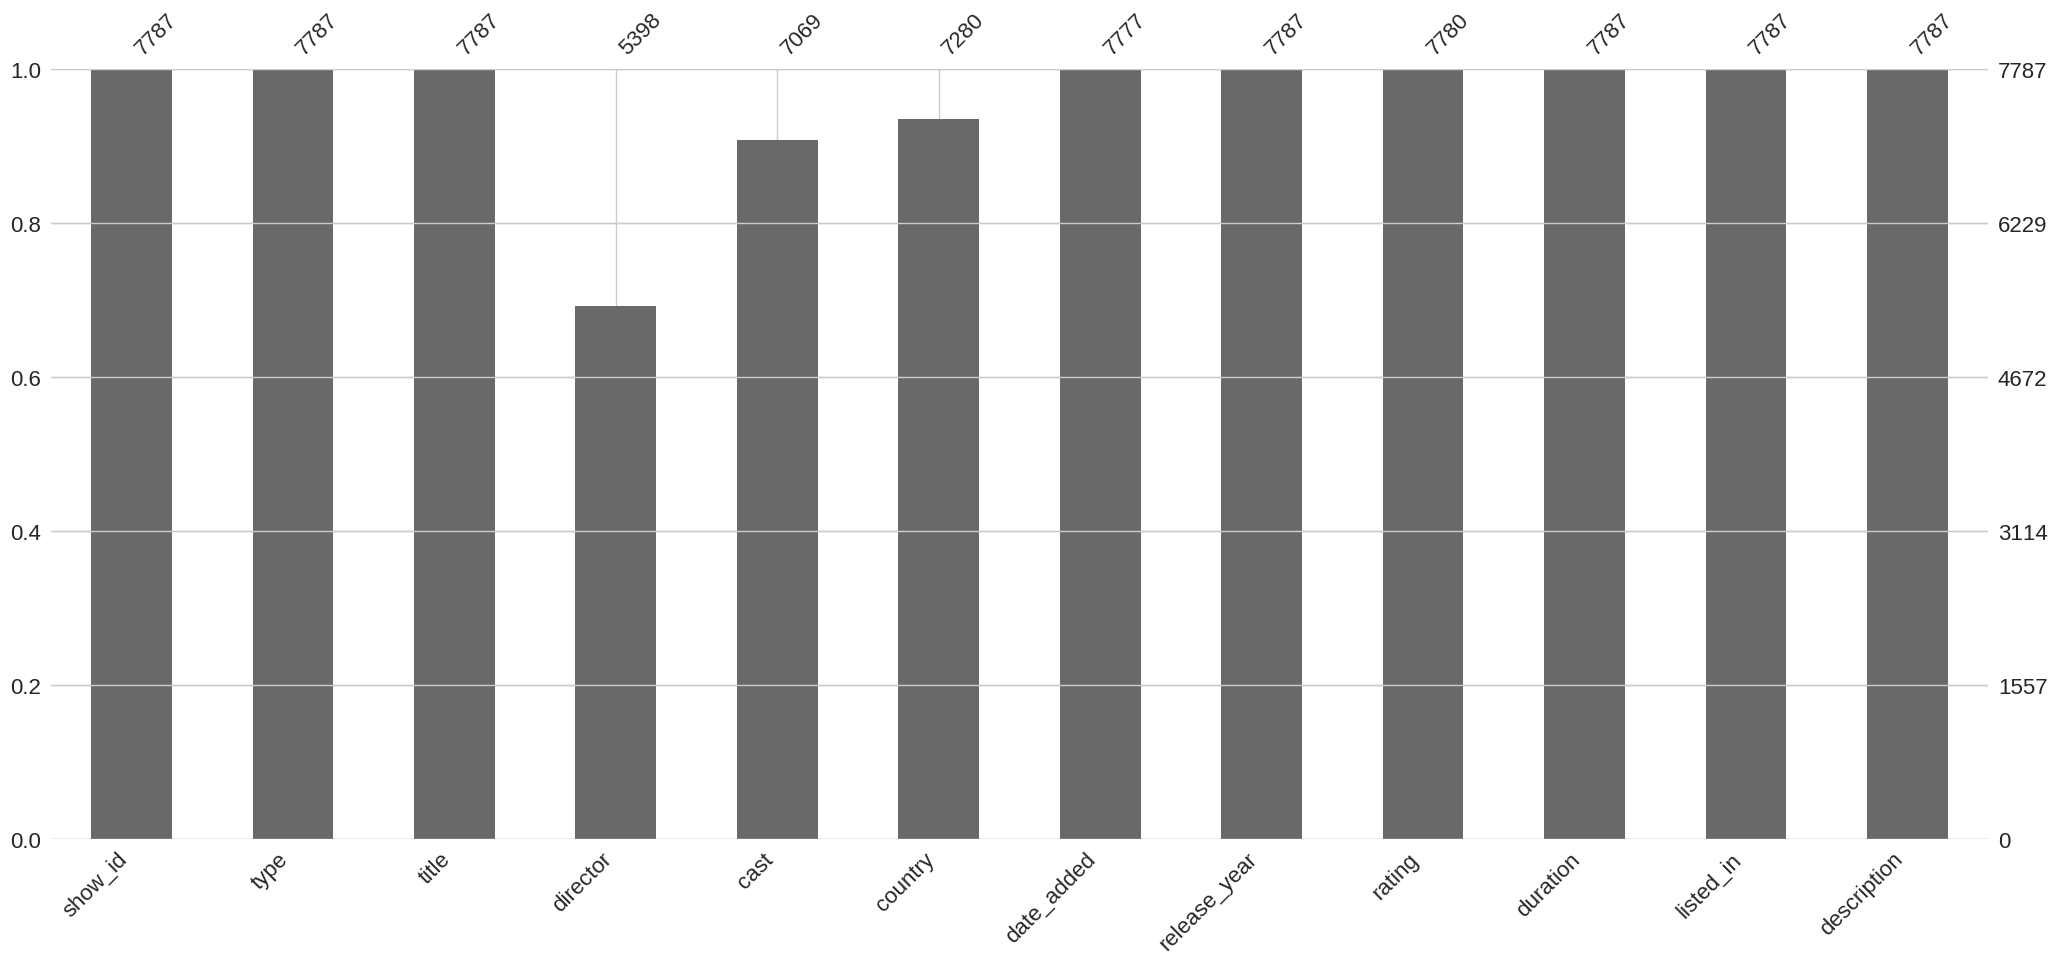

In [155]:
# Visualizing the missing values
msno.bar(data)

### What did you know about your dataset?

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## ***2. Understanding Your Variables***

In [156]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [157]:
# Dataset Describe
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

## ***Attribute Information***

**show_id** : Unique ID for every Movie / Tv Show


**type** : Identifier - A Movie or TV Show


**title** : Title of the Movie / Tv Show


**director** : Director of the Movie


**cast** : Actors involved in the movie / show


**country** : Country where the movie / show was produced


**date_added** : Date it was added on Netflix


**release_year** : Actual Releaseyear of the movie / show


**rating** : TV Rating of the movie / show


**duration** : Total Duration - in minutes or number of seasons


**listed_in** : Genere


**description**: The Summary description


### Check Unique Values for each variable.

In [158]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


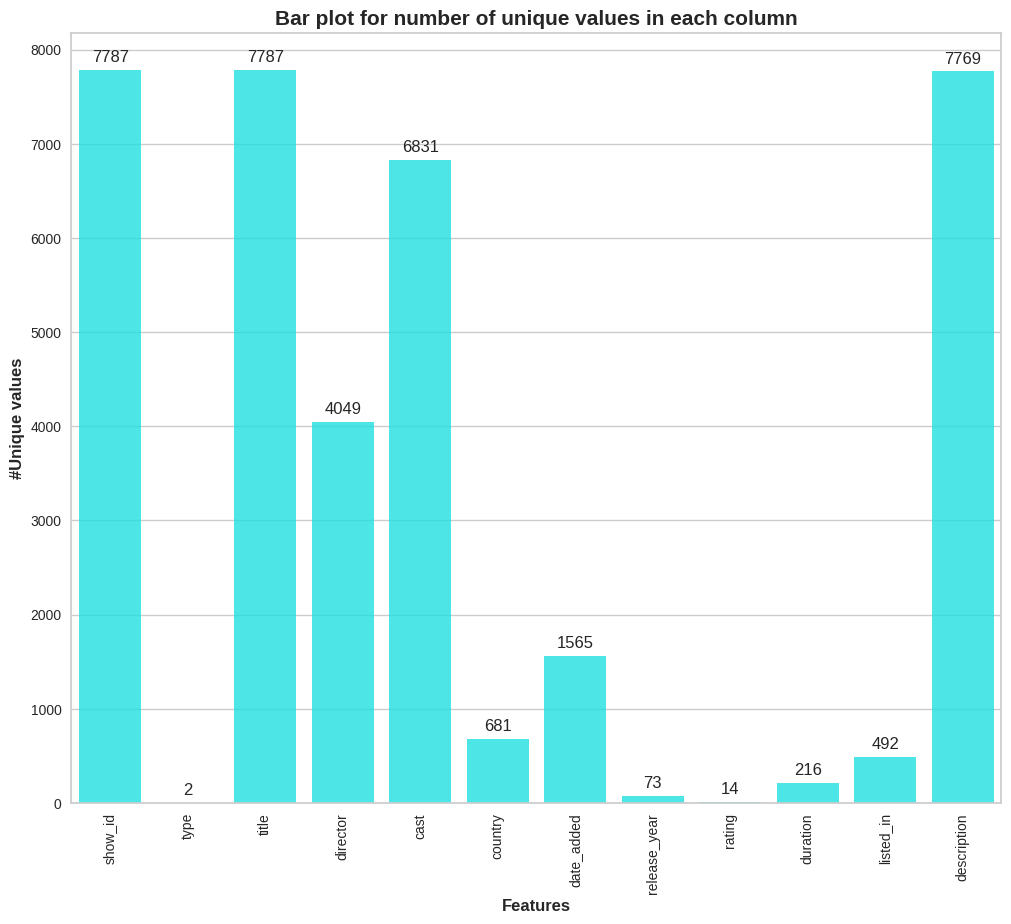

In [159]:
unique_a = pd.DataFrame()
unique_a['Features'] = data.columns
unique = []
for i in data.columns:
    unique.append(data[i].nunique())
unique_a['Uniques'] = unique

f, ax = plt.subplots(1, 1, figsize=(12, 10))

splot = sns.barplot(
    x=unique_a['Features'], y=unique_a['Uniques'],
    alpha=0.8, color='cyan'
)

for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 9),
        textcoords='offset points'
    )

plt.title('Bar plot for number of unique values in each column', weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()


## 3. ***Data Wrangling***

### Data Wrangling Code

In [160]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [161]:
data1=data.copy()

In [162]:
data1.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [163]:
missing_values = data1.isnull().sum()
all_zero = missing_values.sum() == 0

if all_zero:
    print("All columns have zero missing values.")
else:
    print("There are missing values in some columns.")


There are missing values in some columns.


In [164]:
# we will replace this nan values
data1[['director','cast','country']] = data1[['director','cast','country']].fillna('not known')
data1['rating'] = data1['rating'].fillna(data1['rating'].mode()[0])
data1.dropna(axis=0, inplace = True)

In [165]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


In [166]:
# checking our objective column.....
pd.crosstab(type, data1['type'])

type,Movie,TV Show
row_0,,
<class 'type'>,5377,2400


In [167]:
# working wiht date column
data1["date_added"] = pd.to_datetime(data1['date_added'])
data1['days'] = data1['date_added'].dt.day
data1['year'] = data1['date_added'].dt.year
data1['month'] = data1['date_added'].dt.month

In [168]:
#checking  after seperating date ,month,year
data1[["days","year","month"]].sample(5).T

,1099,466,1520,1100,5196
days,24,1,17,25,12
year,2020,2019,2020,2020,2016
month,12,11,8,12,12


In [169]:
# Convert 'data' to a DataFrame if it is a list
if isinstance(data1, list):
    data1= pd.DataFrame(data1)

# Handle missing values in 'country' column
data1['country'] = data1['country'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)



In [170]:
data1['country'].value_counts().reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
index,United States,India,United Kingdom,not known,Canada,Japan,France,South Korea,Spain,Mexico,...,Mauritius,Puerto Rico,Jordan,Slovenia,West Germany,Zimbabwe,Namibia,Soviet Union,Iran,Somalia
country,2877,956,576,506,259,236,196,194,168,123,...,1,1,1,1,1,1,1,1,1,1


In [171]:
# splittig our type column into category
movies = data1[data1['type']=='Movie']
tv_shows= data1[data1['type']=='TV Show']

In [172]:
# code for creating our top 10
# Top 10 actors netflix
data1['cast'] =data1['cast'].astype(str)
data1['cast_name'] =data1['cast'].apply(lambda x :  x.split(','))
cast_count = []
for i in data1['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
columns = {'index' : 'actors_name', 0 : 'movies in which the appeared'}).iloc[1:11]

In [173]:
# working wiht our duration column
data1['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [174]:
# Selecting the durations for movies and tv shows
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Removing string values from tv shows duration and converting into int
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '')
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Seasons', '')
duration_tv_shows.duration = duration_tv_shows.duration.str.replace('s', '')
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Removing string values from movie duration and converting into int
duration_movies.duration = duration_movies.duration.str.replace(' min', '')
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

### What all manipulations have you done and insights you found?

1. Handling null values:

* Created a copy of the dataset to work with.
* Replaced the NaN values in the 'country', 'director', and 'cast' columns with 'Not Known' to preserve the data.
* Avoided dropping these columns to prevent data loss.


2. Handling null values in the 'rating' column:

* Replaced the NaN values in the 'rating' column with the mode (most common) value to fill the missing data.

3. Splitting the 'type' column into TV shows and movies:

* Separated the 'type' column into two categories: TV shows and movies, to analyze them separately.

4. Working with the 'date' column:

* Split the 'date' column into separate columns for months, years, and days to enable further analysis.

5. Extracting top 10 actors from the 'cast' column:

* Implemented code to extract the top 10 actors from the 'cast' column, presumably based on their occurrence or popularity.


6. Handling the 'duration' column:

* Checked the 'duration' column and made necessary changes.
Replaced unwanted parts and converted the column into an integer format, possibly for consistency or further calculations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [175]:
data1['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

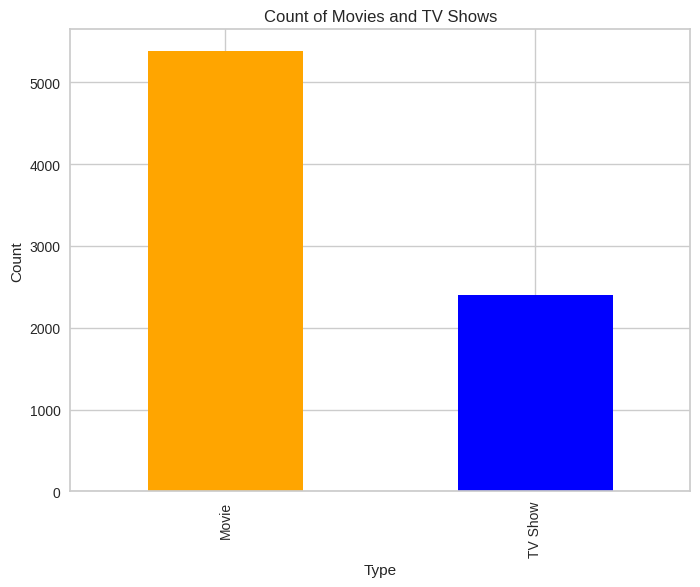

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a column 'type'

# Calculate the frequencies of each type
type_counts = data1['type'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color=['orange', 'blue'])
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [177]:
type_counts = data1['type'].value_counts()

In [178]:
type_counts

Movie      5377
TV Show    2400
Name: type, dtype: int64

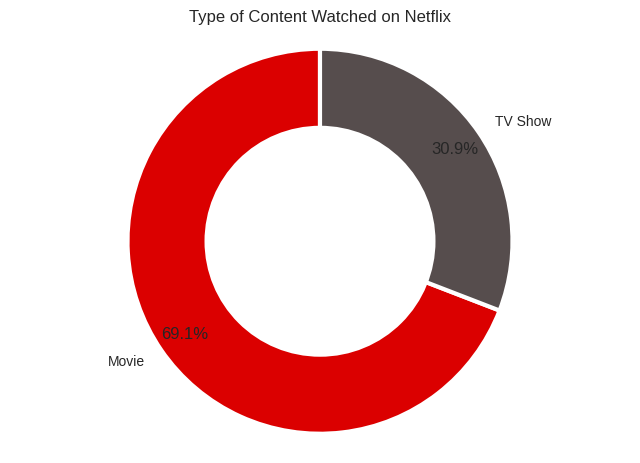

In [179]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = [ 'Movie','TV Show']
Movie=5377
TV_Show=2400
sizes = [Movie, TV_Show]
colors = ['#db0000', '#564d4d']

# Create the pie chart with a hole
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 3, 'edgecolor': 'white'}, pctdistance=0.85)
plt.title('Type of Content Watched on Netflix')

# Create a white circle in the middle to make a hole
center_circle = plt.Circle((0, 0), 0.60, fc='white')

# Get the current axes and add the center circle to create a hole effect
ax = plt.gca()
ax.add_patch(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


##### 1. Why did you pick the specific chart?

Because it was clearly seen that we have two types of categoires in our data and bar chart would be the best for the visualization of the following



##### 2. What is/are the insight(s) found from the chart?

We can clearly see that the content are of tv shows is less compared to   the movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can help in many ways as we can see the chart for the movies part is more which make makers more to work on movies than tvshows.
People engagement is more on movies rather then tv shows..

#### Chart - 2

In [180]:
country_content_count = data1['country'].value_counts().reset_index()
country_content_count

,index,country
0,United States,2877
1,India,956
2,United Kingdom,576
3,not known,506
4,Canada,259
...,...,...
77,Zimbabwe,1
78,Namibia,1
79,Soviet Union,1
80,Iran,1


In [181]:
import plotly.graph_objects as go

# Sample data
data = {
    'Country': ['USA', 'IND', 'GBR', 'unknown','CAN'],
    'Content Count': [2877, 956, 576, 506,259]
}

# Create a DataFrame
country_content_count = pd.DataFrame(data)

# Create a Choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=country_content_count['Country'],
    z=country_content_count['Content Count'],
    text=country_content_count['Content Count'],
    colorscale='Viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Content Count'
))

# Update the layout
fig.update_layout(
    title='Netflix Content Count by Country',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

# Show the figure
fig.show()


In [182]:
import pandas as pd
import plotly.express as px

# Calculate content count by country
country_content_count = data1['country'].value_counts().reset_index()
country_content_count.columns = ['Country', 'Content Count']

# Sort the dataframe by content count in descending order
country_content_count = country_content_count.sort_values('Content Count', ascending=False)

# Plot the content count
fig = px.bar(country_content_count, x='Country', y='Content Count', color='Country',
             title='Netflix Content Count by Country', labels={'Country': 'Country', 'Content Count': 'Content Count'})

# Rotate x-axis labels for better visibility
fig.update_layout(xaxis_tickangle=-45)

# Show the figure
fig.show()


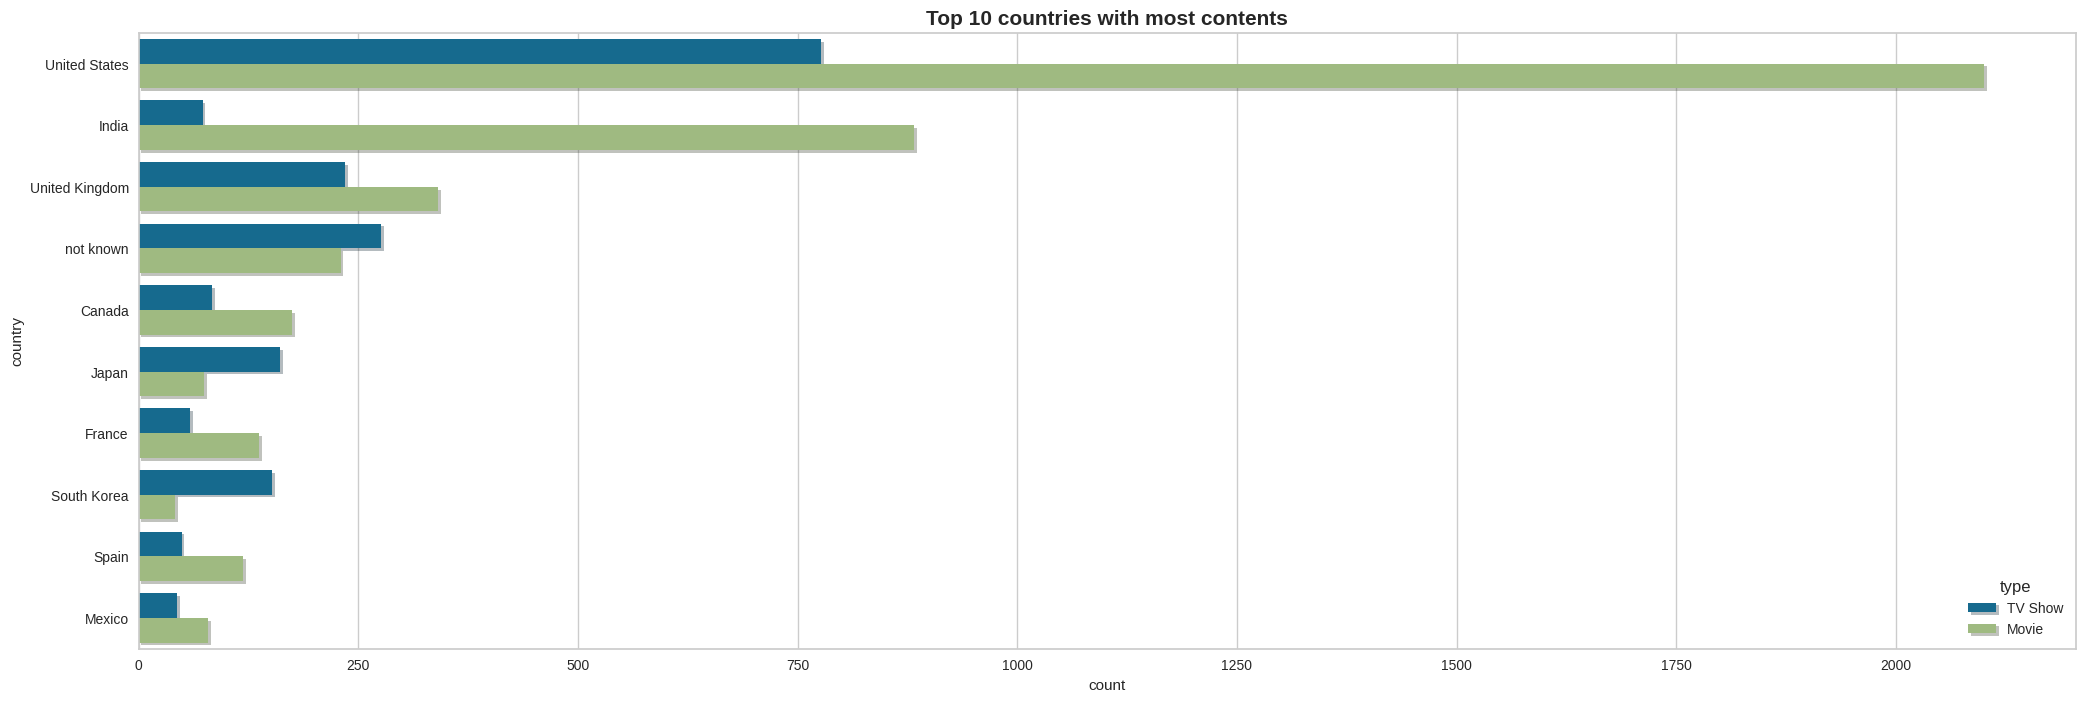

In [183]:
plt.figure(figsize=(25,8))
sns.countplot(y=data1['country'],order=data1['country'].value_counts().index[0:10],path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],hue=data1['type'])
plt.xticks(rotation=360)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()


1. Why did you pick the specific chart?

I have created this bar graph to examine the distribution of content across the top 10 countries on Netflix, specifically focusing on the countries with the highest number of content available.

2. What is/are the insight(s) found from the chart?

1. The United States has the highest number of content available on Netflix compared to other countries in the top 10.
2. Other countries with a significant presence of content on Netflix include India, United Kingdom, Canada, and Japan.
3. The distribution of content varies across these countries, indicating diverse regional preferences and production industries.
4. There is a notable drop in the number of content available for countries beyond the top 5.
5. The insights suggest that Netflix has invested heavily in acquiring and producing content from these top countries, catering to the preferences of their respective audiences.




3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help Netflix in understanding the content distribution landscape and making informed decisions about content acquisition, regional targeting, and strategic partnerships to enhance user engagement and satisfaction.

####chart-3

In [184]:
data1['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7777, dtype: object

In [185]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data1['target_ages'] = data1['rating'].replace(ratings)


In [186]:

# type should be a catego
data1['type'] = pd.Categorical(data1['type'])
data1['target_ages'] = pd.Categorical(data1['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [187]:
#creating two extra columns
tv_shows=data1[data1['type']=='TV Show']
movies=data1[data1['type']=='Movie']

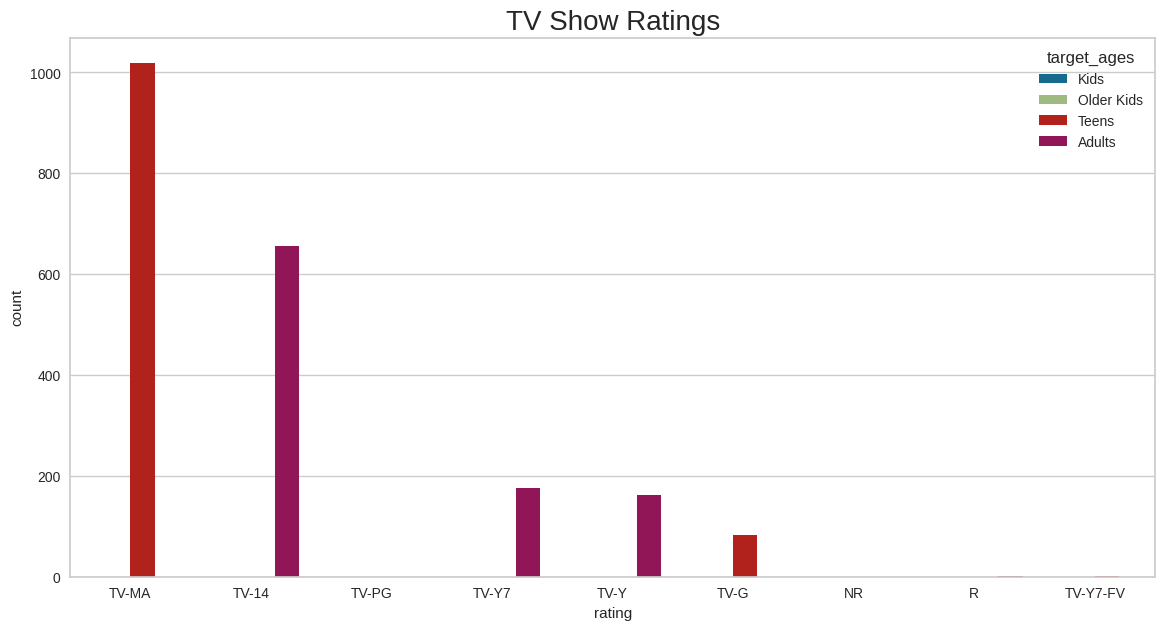

In [188]:
# Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
fig_dims = (14, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='rating', y='count', hue=movies['target_ages'], data=tv_ratings)
plt.title('TV Show Ratings', size='20')
plt.show()


TV-MA has the highest number of ratings for tv shows i,e adult ratings

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

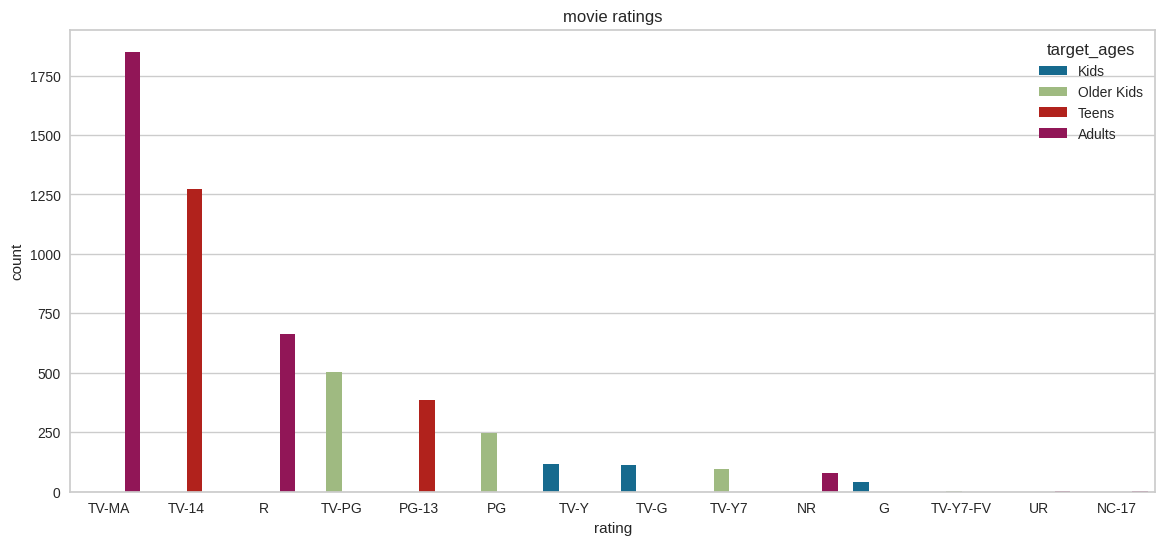

In [189]:

#Movie Ratings based on Target Age Groups
plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

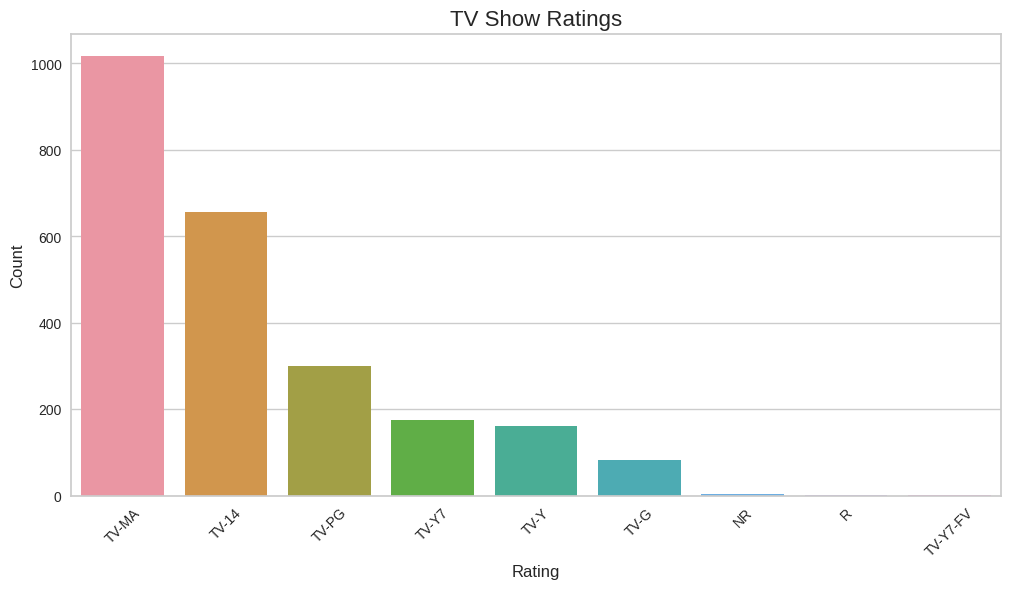

In [190]:
# Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='rating', y='count', data=tv_ratings, ax=ax)
ax.set_title('TV Show Ratings', fontsize=16)
ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', rotation=45)

plt.show()


1. Why did you pick the specific chart?

I have created this bar graph to explore the ratings of Netflix shows and movies based on their target age audiences.

2. What is/are the insight(s) found from the chart?

 gained insights into the ratings of Netflix shows and movies based on their target age audiences.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the ratings of Netflix shows and movies based on target age audiences can potentially have a positive business impact. By understanding the preferences of different age groups, Netflix can tailor its content offerings to enhance viewer engagement and satisfaction. However, if certain age groups show lower ratings or declining trends, it could lead to negative growth if not addressed effectively. Netflix should use these insights to inform content strategy and ensure they cater to the needs of all target age audiences.

####chart-4

In [191]:
data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,days,year,month,cast_name,target_ages
0,s1,TV Show,3%,not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens


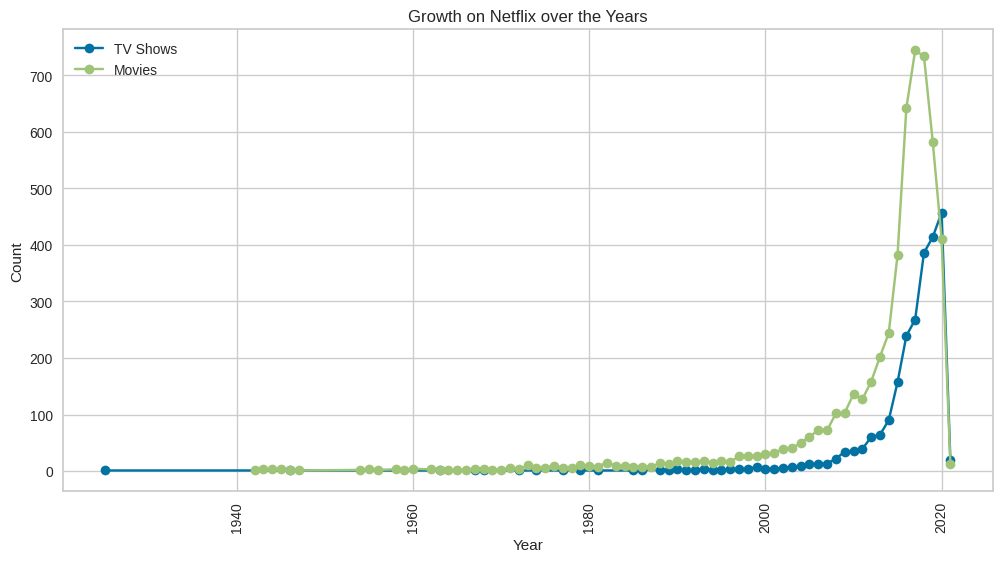

In [192]:


# Contents for TV shows
content_1 = tv_shows['release_year'].value_counts().reset_index()
content_1 = content_1.rename(columns={'release_year': 'count', 'index': 'year'})
content_1 = content_1.sort_values('year')

# Contents for movies
content_2 = movies['release_year'].value_counts().reset_index()
content_2 = content_2.rename(columns={'release_year': 'count', 'index': 'year'})
content_2 = content_2.sort_values('year')

# Plotting the contents over the years
plt.figure(figsize=(12, 6))

plt.plot(content_1['year'], content_1['count'], marker='o', label='TV Shows')
plt.plot(content_2['year'], content_2['count'], marker='o', label='Movies')

plt.title('Growth on Netflix over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)

plt.show()


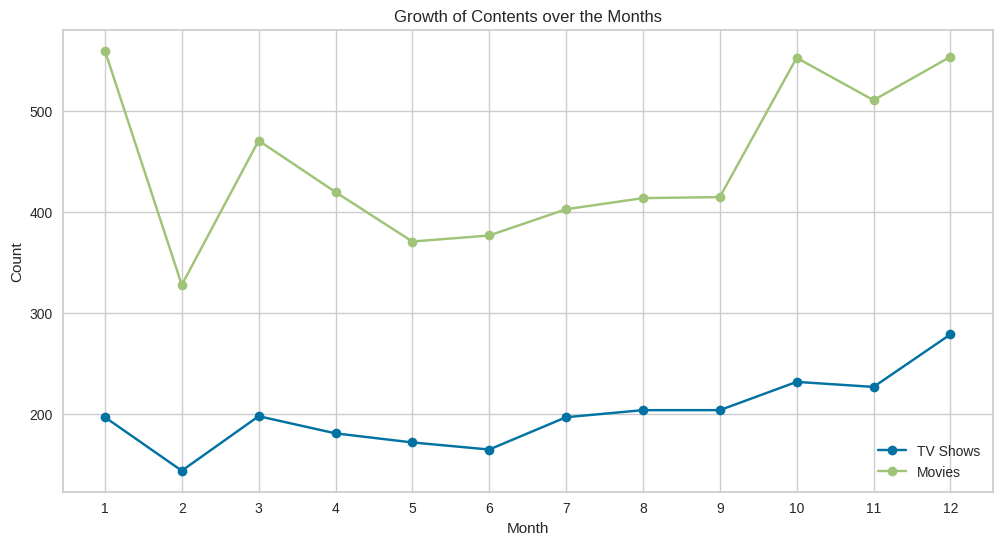

In [193]:


# Extracting the month from the 'date_added' column
tv_shows['month'] = pd.to_datetime(tv_shows['date_added']).dt.month
movies['month'] = pd.to_datetime(movies['date_added']).dt.month

# Contents for TV shows
content_1 = tv_shows['month'].value_counts().reset_index()
content_1 = content_1.rename(columns={'month': 'count', 'index': 'month'})
content_1 = content_1.sort_values('month')

# Contents for movies
content_2 = movies['month'].value_counts().reset_index()
content_2 = content_2.rename(columns={'month': 'count', 'index': 'month'})
content_2 = content_2.sort_values('month')

# Plotting the growth of contents over the months
plt.figure(figsize=(12, 6))

plt.plot(content_1['month'], content_1['count'], marker='o', label='TV Shows')
plt.plot(content_2['month'], content_2['count'], marker='o', label='Movies')

plt.title('Growth of Contents over the Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.xticks(range(1, 13))  # Assuming months are represented as 1-12

plt.show()


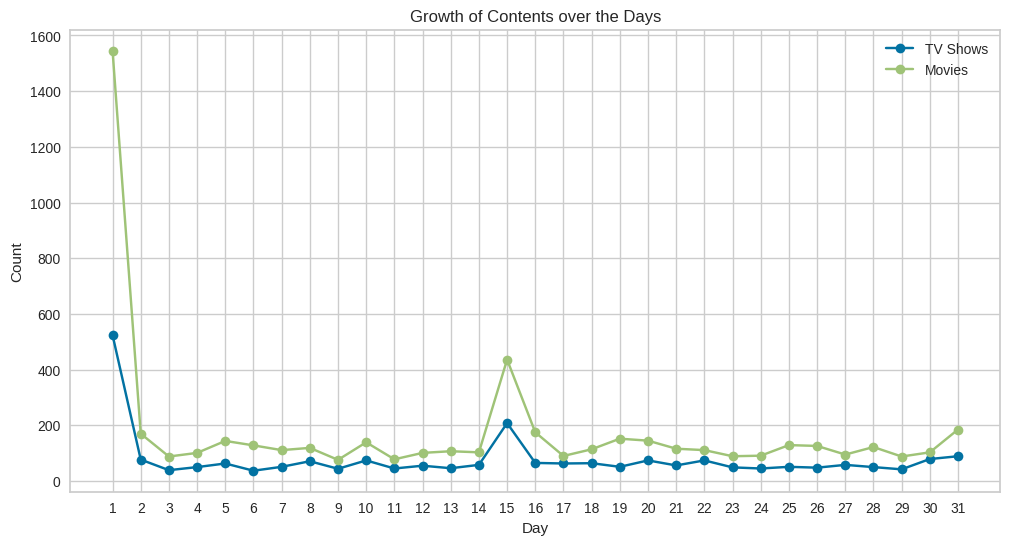

In [194]:
# Extracting the day from the 'date_added' column
tv_shows['days'] = pd.to_datetime(tv_shows['date_added']).dt.day
movies['days'] = pd.to_datetime(movies['date_added']).dt.day

# Contents for TV shows
content_1 = tv_shows['days'].value_counts().reset_index()
content_1 = content_1.rename(columns={'days': 'count', 'index': 'days'})
content_1 = content_1.sort_values('days')

# Contents for movies
content_2 = movies['days'].value_counts().reset_index()
content_2 = content_2.rename(columns={'days': 'count', 'index': 'days'})
content_2 = content_2.sort_values('days')

# Plotting the growth of contents over the days
plt.figure(figsize=(12, 6))

plt.plot(content_1['days'], content_1['count'], marker='o', label='TV Shows')
plt.plot(content_2['days'], content_2['count'], marker='o', label='Movies')

plt.title('Growth of Contents over the Days')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend()
plt.xticks(range(1, 32))  # Assuming days are represented as 1-31

plt.show()


##### 1. Why did you pick the specific chart?


I have selected this chart to observe the growth of Netflix shows and movies over the years, months, and days.

##### 2. What is/are the insight(s) found from the chart?


The insights from the chart show the growth trends of Netflix shows and movies over time. It provides information on the number of shows and movies released each year, month, and day. This data can help identify periods of high content production and understand the overall growth patterns of Netflix's content library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights can potentially help create a positive business impact for Netflix. By understanding the growth patterns of their shows and movies over time, Netflix can make informed decisions regarding content production, licensing, and resource allocation. They can identify periods of high demand and plan their content release strategies accordingly, which can attract and retain more subscribers, leading to positive business growth.

#### Chart - 5

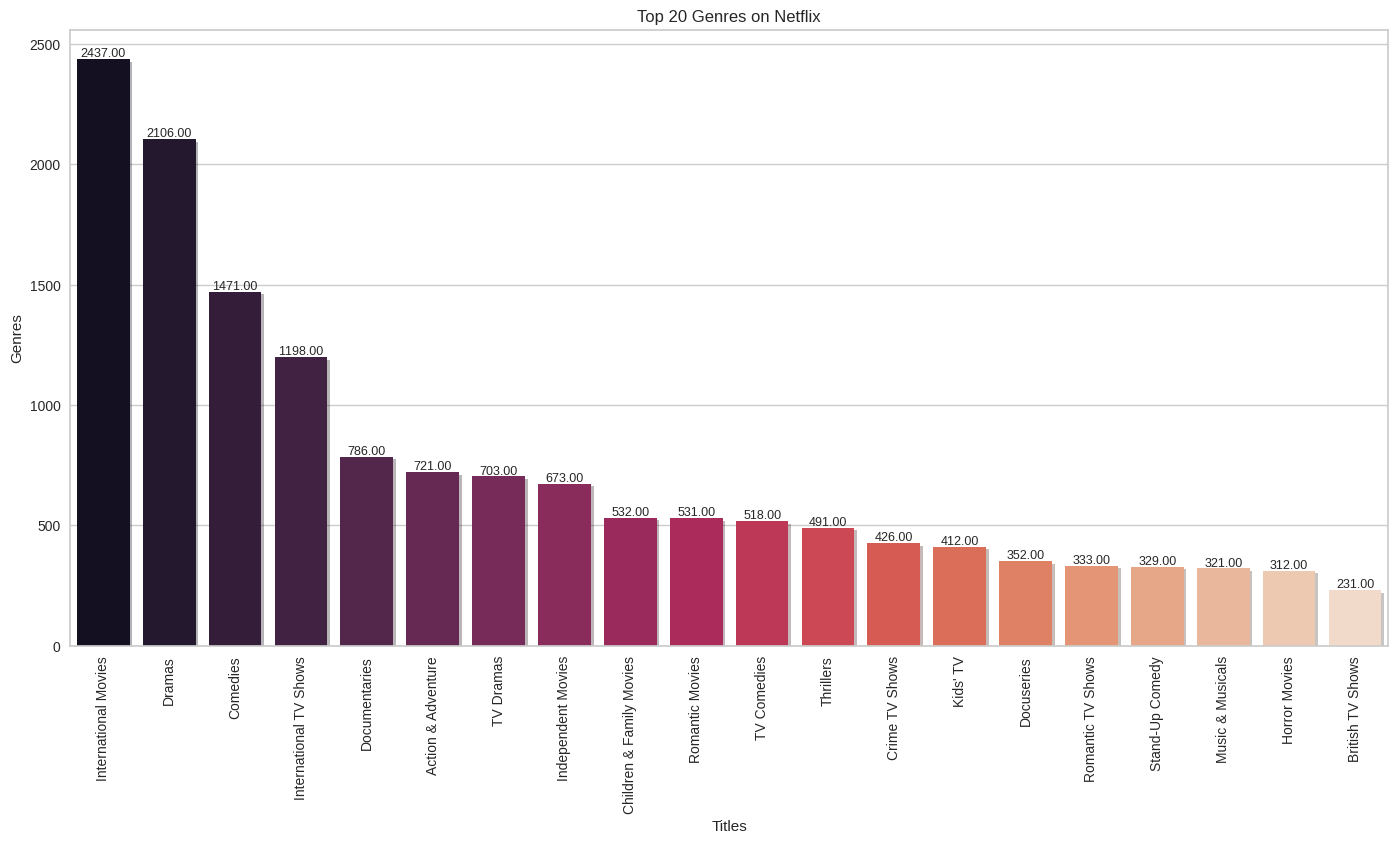

In [195]:
#Top 20 Genres(listed_in) on Netflix
filtered_genres = data1.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(17,8))
g = sns.countplot(x = filtered_genres,palette="rocket" ,path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],order=filtered_genres.value_counts().index[:20])
plt.xticks(rotation = 90)
for bar in g.patches:
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()


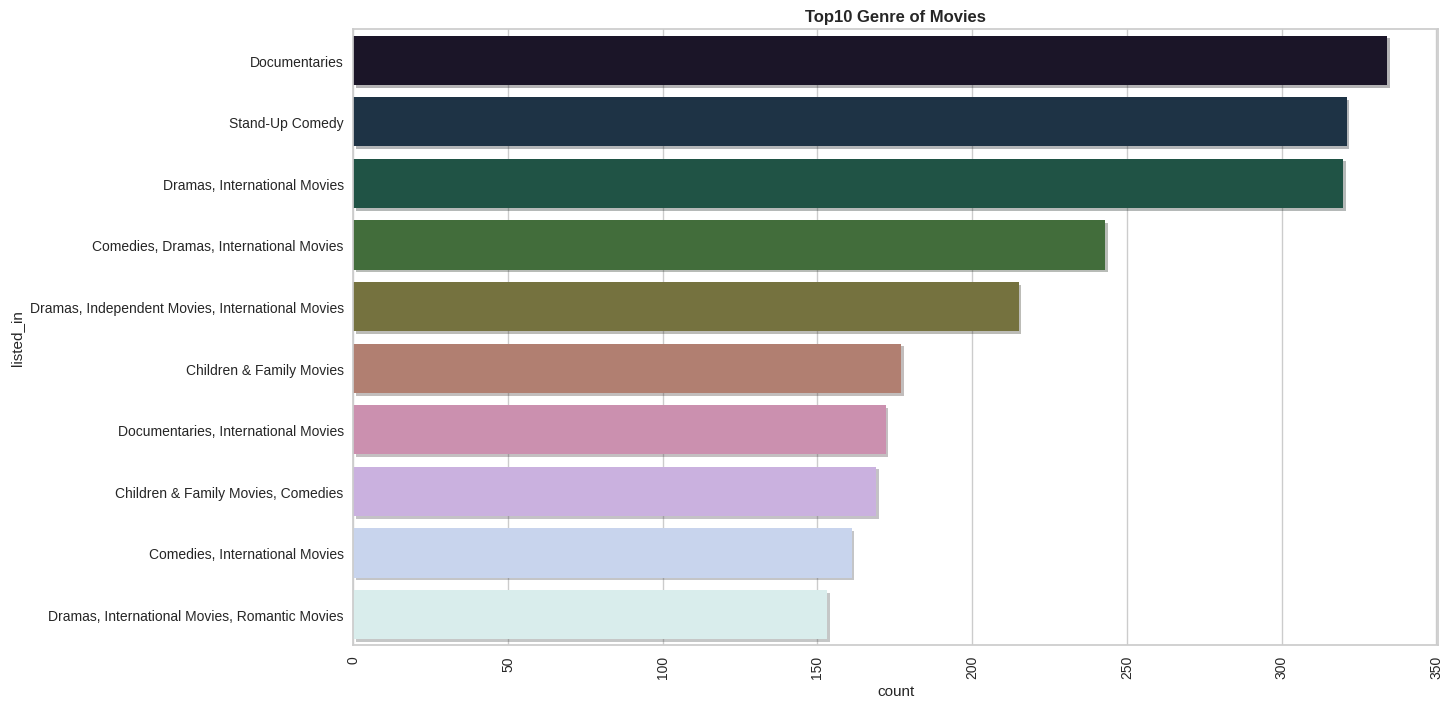

In [196]:
#Analysing top10 genres of movies
plt.figure(figsize=(14,8))
plt.title('Top10 Genre of Movies',fontweight="bold")
plt.xticks(rotation = 90)
g=sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],palette="cubehelix")

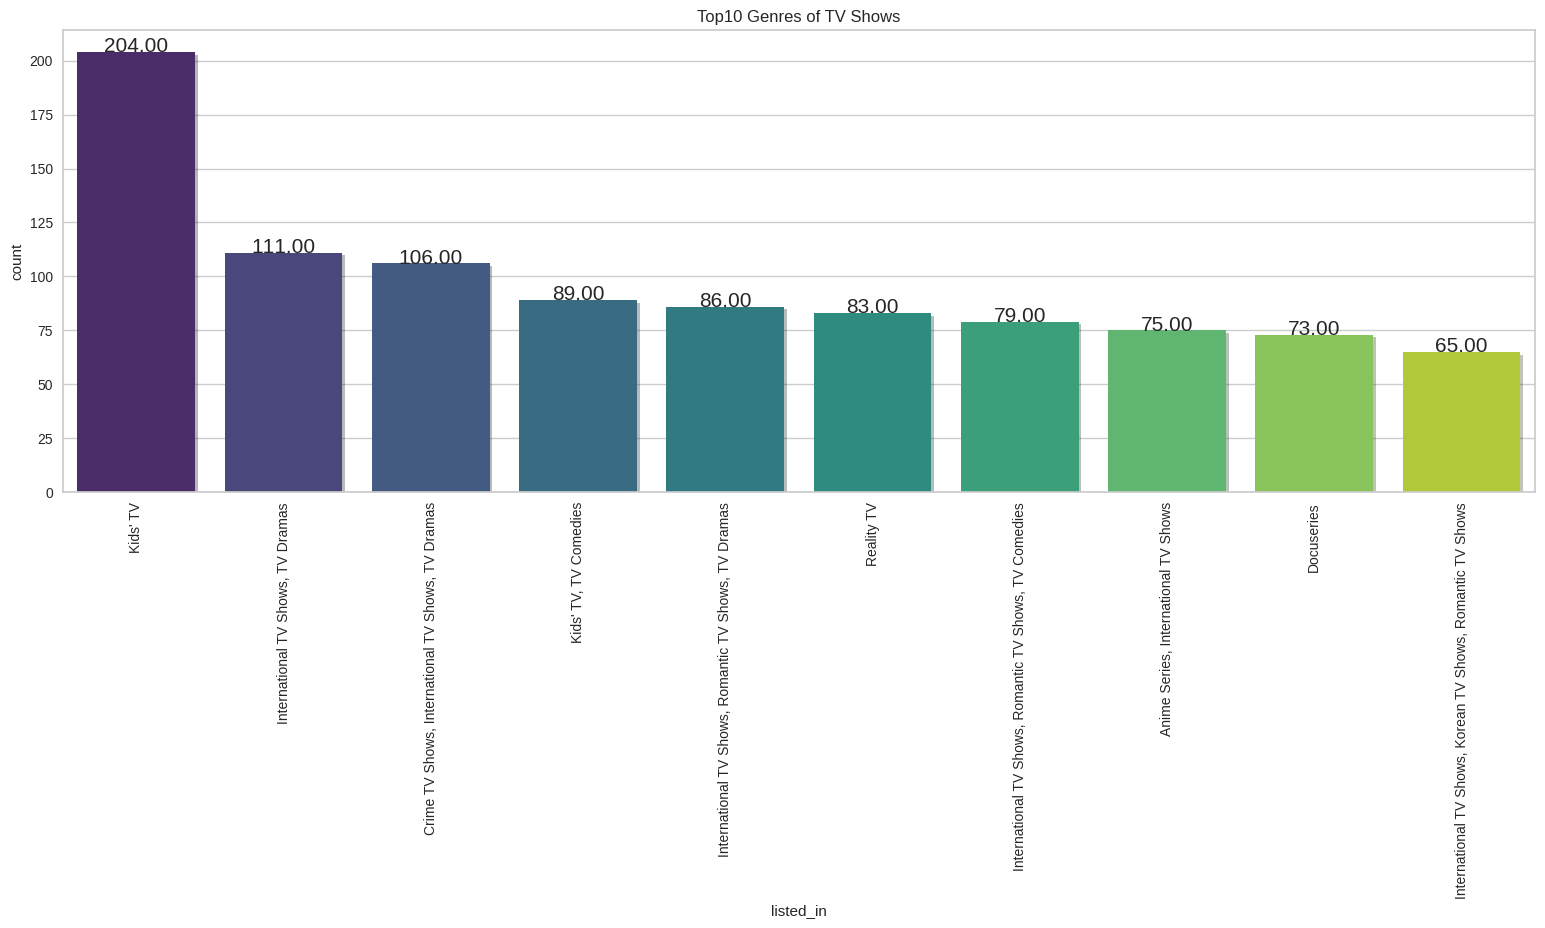

In [197]:
#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(19,6))
plt.title('Top10 Genres of TV Shows')
plt.xticks(rotation = 90)
g=sns.countplot(x=tv_shows['listed_in'],data=tv_shows,path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],order=tv_shows['listed_in'].value_counts().index[0:10],palette="viridis")
for bar in g.patches:
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 4),
                   textcoords='offset points')

##### 1. Why did you pick the specific chart?

I have selected this graph to analyze the top genres for both TV shows and movies on Netflix. By examining the distribution of genres, I can gain insights into the most popular content categories among viewers.

##### 2. What is/are the insight(s) found from the chart?

 we gained insights into the top genres for both TV shows and movies on Netflix. This information can help us understand the preferences of viewers and identify the content categories that have high demand. It can also assist in making data-driven decisions related to content acquisition, production, and marketing strategies

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights into the top genres across movies and TV shows on Netflix can guide content acquisition strategies, content production decisions, and marketing efforts. By understanding the preferences of their audience, Netflix can curate and promote content that aligns with these popular genres, enhancing viewer satisfaction and engagement on the platform.

#### Chart - 6

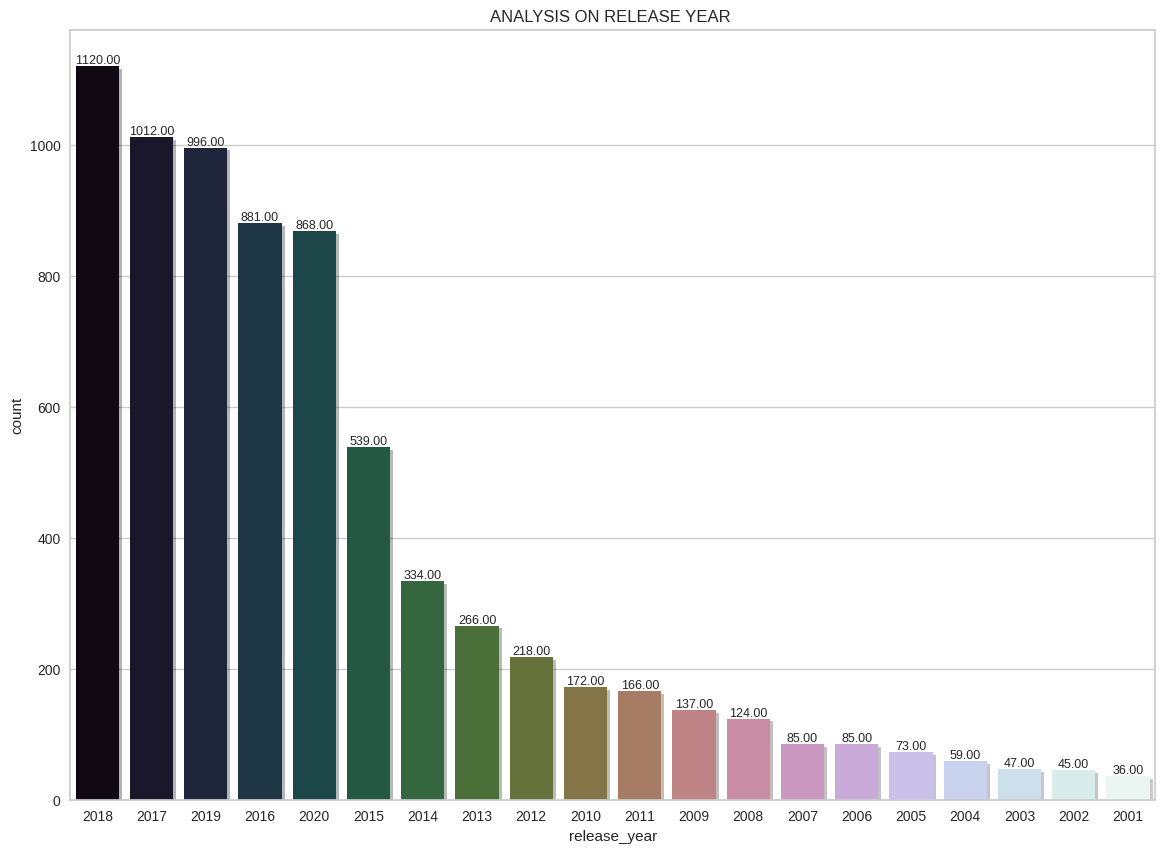

In [198]:
# Chart - 4 visualization code
#ANALYSIS ON RELEASE YEAR
plt.figure(figsize=(14,10))
ax = sns.countplot(x="release_year", data=data1, palette="cubehelix", path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],order=data1['release_year'].value_counts().index[0:20])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('ANALYSIS ON RELEASE YEAR ')
plt.show()

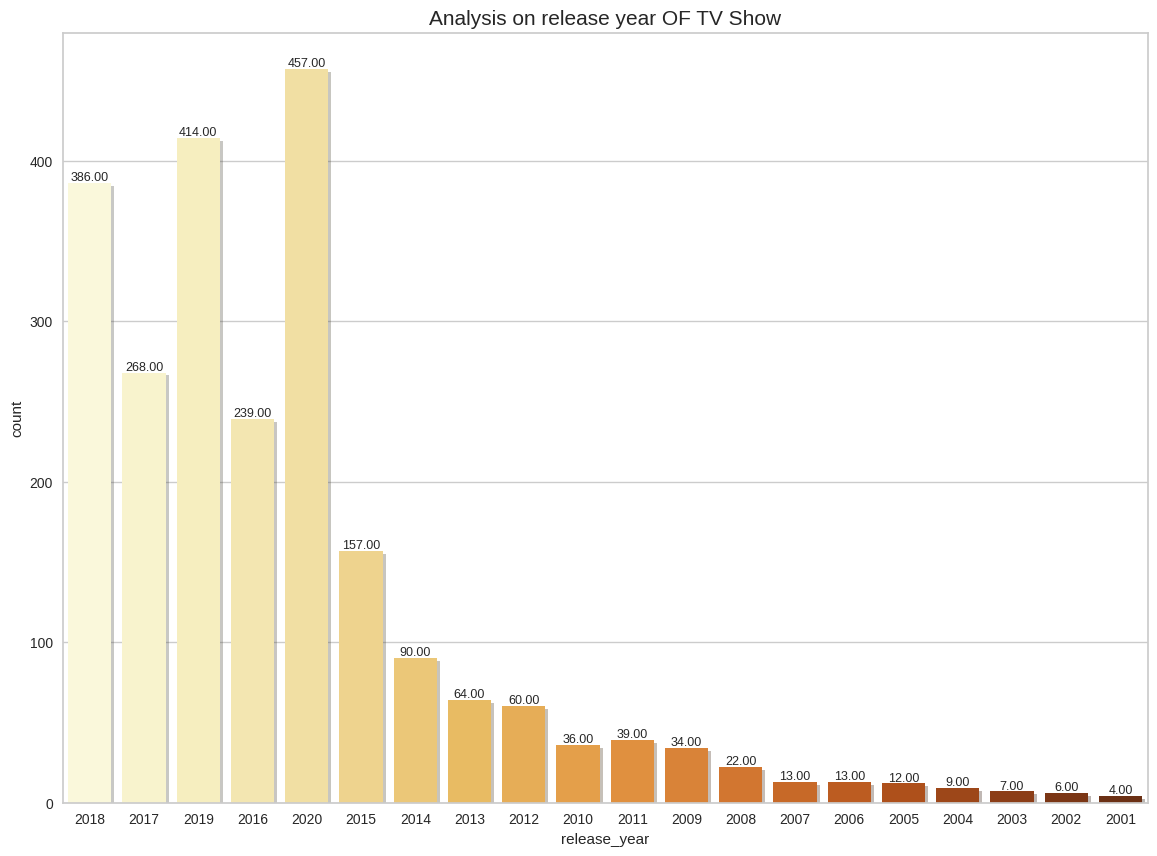

In [199]:
#ANALYSIS ON RELEASE  OF TV Show
plt.figure(figsize=(14,10))
ax = sns.countplot(x="release_year", data=tv_shows, palette="YlOrBr",path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()], order=data1['release_year'].value_counts().index[0:20])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('Analysis on release year OF TV Show', fontsize=15)
plt.show()

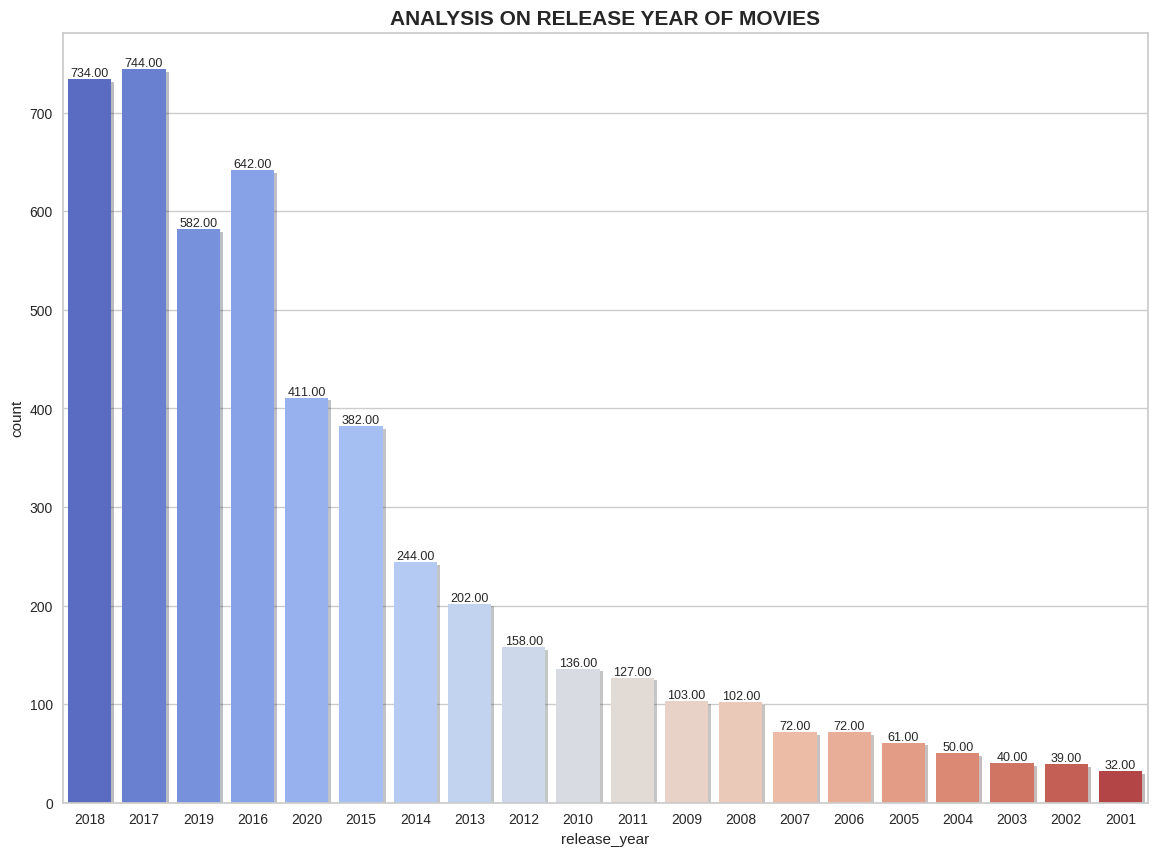

In [200]:
#Year wise analysis for movies
plt.figure(figsize=(14,10))
ax = sns.countplot(x="release_year", data=movies, palette="coolwarm", path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],order=data1['release_year'].value_counts().index[0:20])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

I have selected this chart to analyze the distribution of movie and TV show content based on their release years.

##### 2. What is/are the insight(s) found from the chart?

The analysis reveals a consistent increase in the number of releases on Netflix since 2001, reaching its highest point in 2018. This upward trend indicates a continuous expansion of the content library on the platform, catering to the diverse preferences of Netflix viewers.

Examining the releases specifically categorized as TV shows, the analysis shows a positive trend with a steady growth in the number of releases year by year. The peak in TV show releases was observed in 2020, indicating a significant investment in producing and acquiring new TV show content. This trend demonstrates Netflix's commitment to providing a vast selection of TV shows to meet the evolving interests of its audience.

On the other hand, when looking at the release years of movies, there is a notable peak in 2017 following a steady increase in previous years. However, there is a slight decline in the number of movie releases in 2018, followed by a more significant decline in 2019 and 2020. This pattern suggests a temporary slowdown in movie releases during those years, which could be influenced by various factors such as production schedules, market demand, and strategic decisions made by Netflix.

Overall, the analysis highlights Netflix's continuous efforts to expand its content offerings, with a strong focus on TV show releases. While there may be fluctuations in the number of movie releases during certain years, Netflix remains dedicated to providing a diverse range of content to its global audience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights into the release patterns of content on Netflix can inform decision-making processes related to content acquisition, production, and release scheduling. By understanding the trends and fluctuations in release years, Netflix can strategically plan and optimize their content offerings to meet audience expectations and maintain a fresh and engaging content library.




#### Chart - 5

<Figure size 1400x800 with 0 Axes>

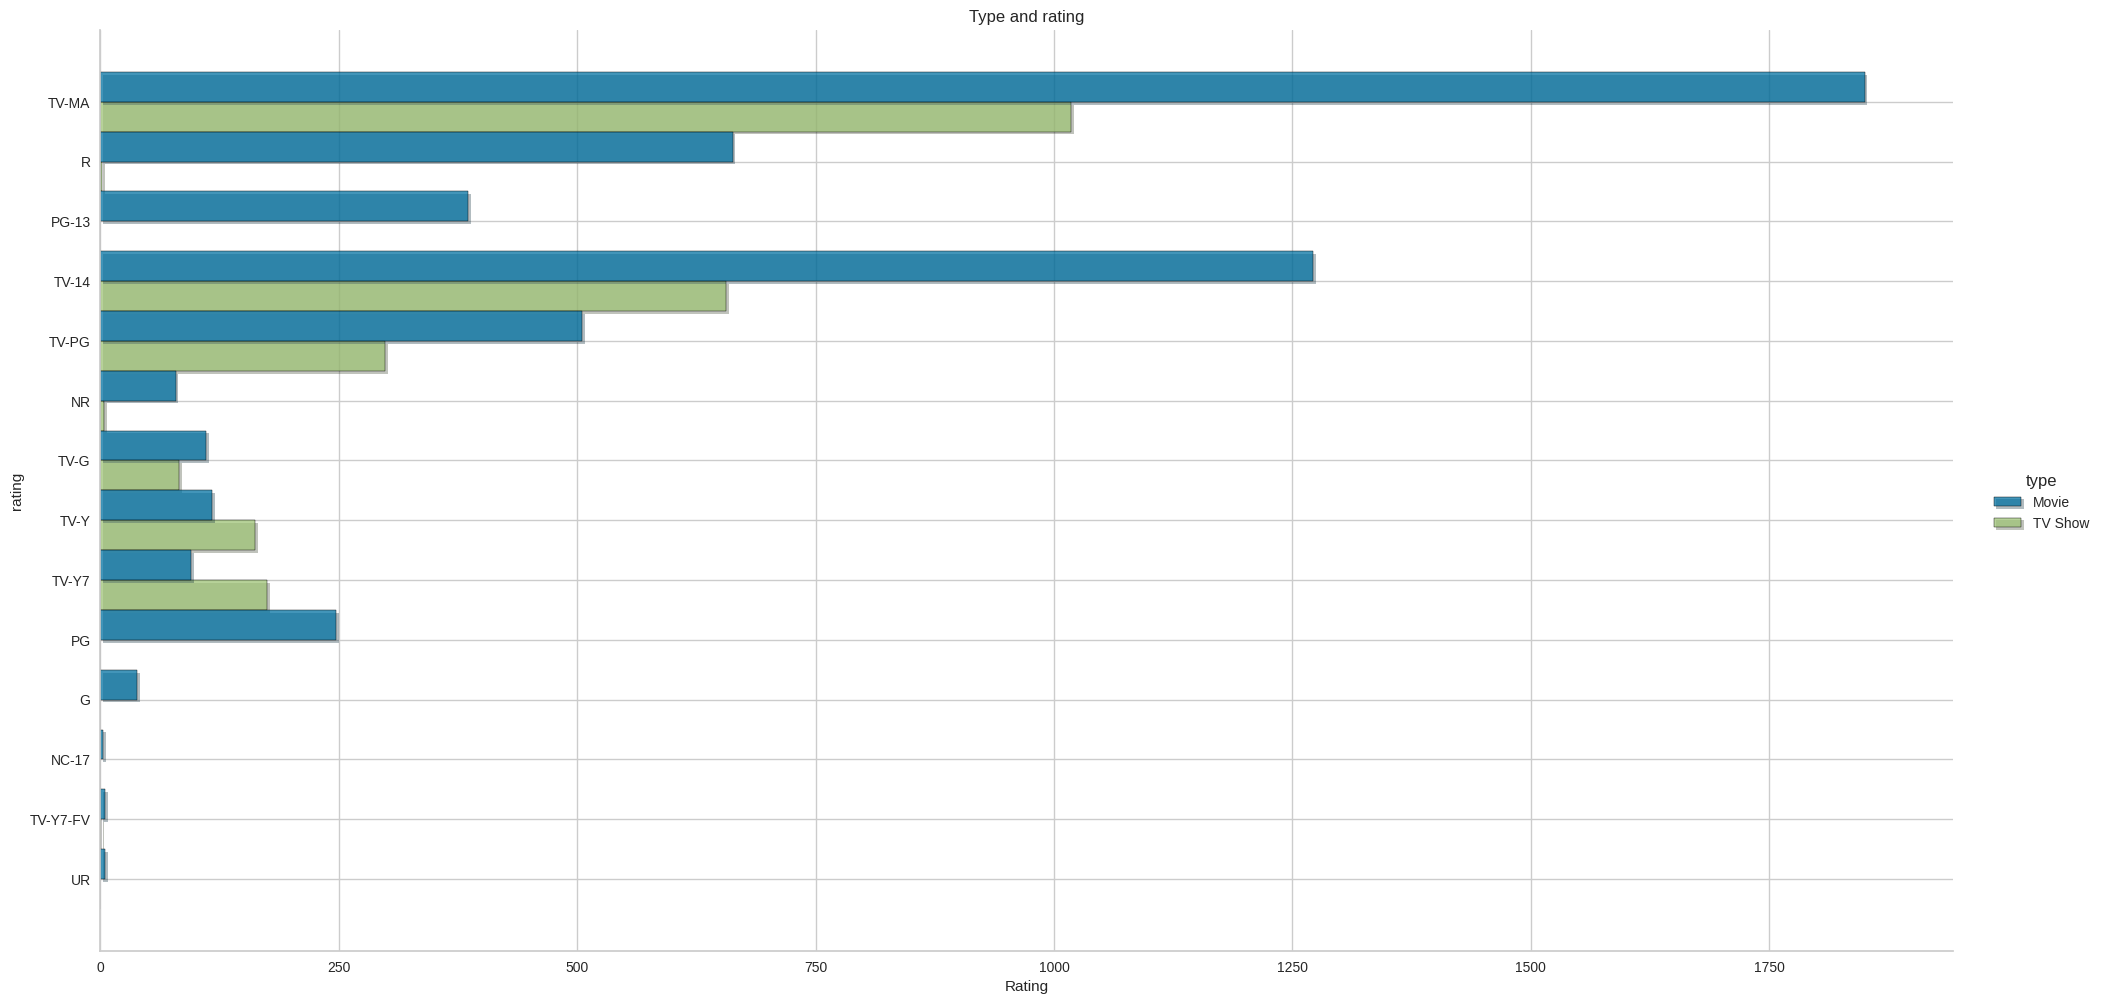

In [201]:
# plotting a bar chart for this..
a = plt.figure(figsize=(14,8))
a = sns.displot(y= data1['rating'], hue = 'type', data = data1, kind = 'hist', height=10, aspect=2, bins = 50,path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()] ,multiple='dodge')
a = plt.title('Type and rating')
a = plt.xlabel('Rating')

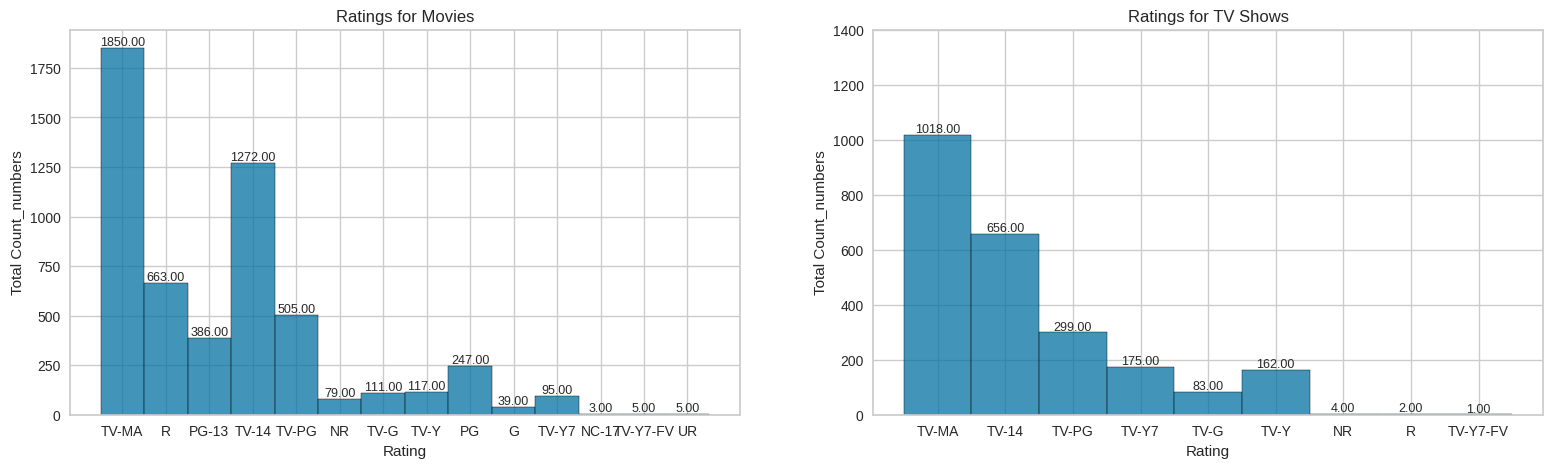

In [202]:
# Ratings for TV show and movies individually
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(movies.rating, ax=ax[0]);
for bar in g1.patches:
    g1.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('ANALYSIS ON RELEASE YEAR ', fontsize=15)
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count_numbers")
g2 = sns.histplot(tv_shows.rating, ax=ax[1]);
for bar in g2.patches:
    g2.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('ANALYSIS ON RELEASE YEAR ', fontsize=15)
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count_numbers")
fig.show()

##### 1. Why did you pick the specific chart?

To gain insights into the ratings and types of content on Netflix,

Rating Analysis:

The data reveals a wide range of ratings for content on Netflix, including various age categories such as TV-Y, TV-MA, PG, etc.
By examining the distribution of ratings, we can identify the most common rating categories and understand the content's intended audience.

Type Analysis:

The content on Netflix can be categorized into two main types: movies and TV shows.
By analyzing the distribution of types, we can determine the proportion of movies and TV shows in the Netflix library.
This analysis can provide insights into the platform's content strategy and help understand the viewers' preferences regarding movie vs. TV show content.

##### 2. What is/are the insight(s) found from the chart?

After analyzing the ratings for movies and TV shows on Netflix, it is evident that the "TV-MA" rating category has the highest ratings for both types of content. This rating indicates that the content is intended for mature audiences

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The prevalence of the "TV-MA" rating suggests that Netflix offers a significant amount of content that caters to adult viewership. This information is valuable for understanding the content preferences and target audience of the platform.

By recognizing the popularity of the "TV-MA" rating, content creators and providers can make informed decisions about the type of content to develop or license for distribution on Netflix. Additionally, this insight can help users make choices based on their viewing preferences and ensure they have access to content suitable for their age and preferences.

#### Chart - 6

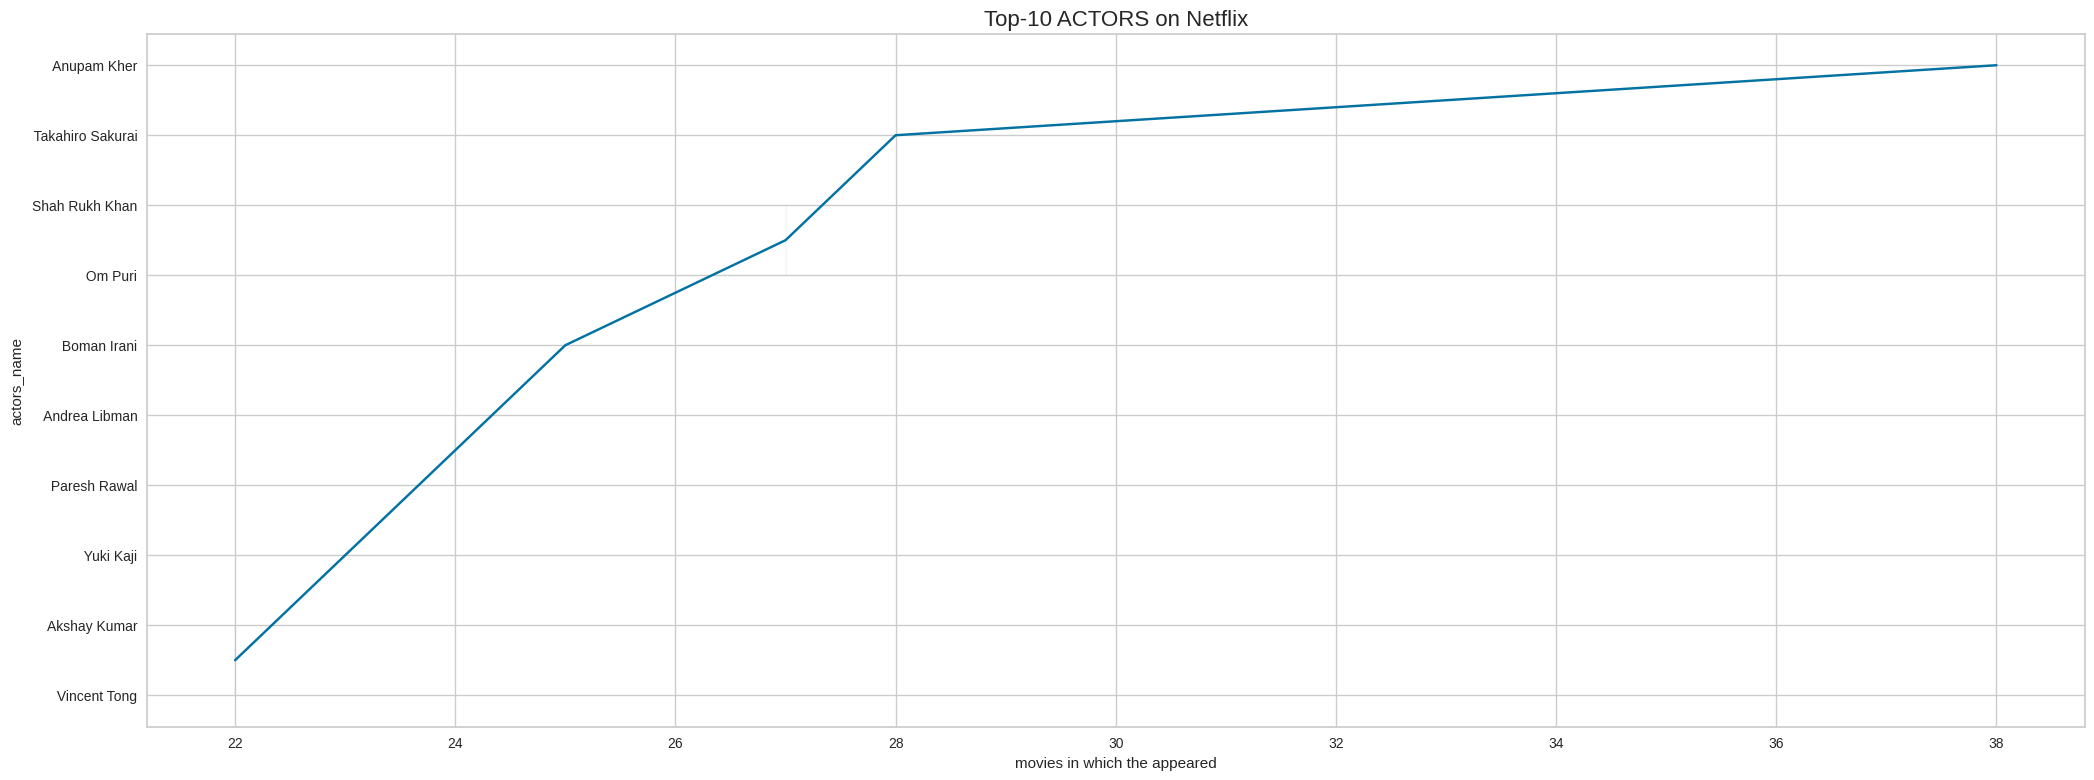

In [203]:
plt.figure(figsize=(25,9))
sns.lineplot(y='actors_name',x='movies in which the appeared',data=df_cast_count)
plt.title("Top-10 ACTORS on Netflix",size='16')
plt.xticks(rotation=360)
plt.show()

In [ ]:
plt.figure(figsize=(25,9))
ax=sns.barplot(x='actors_name',y='movies in which the appeared',path_effects=[path_effects.SimplePatchShadow(),path_effects.Normal()],data=df_cast_count)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 4),
                   textcoords='offset points')
plt.title('ANALYSIS ON RELEASE YEAR ', fontsize=15)
plt.title("Top-10 ACTORS on Netflix",size='16')
plt.xticks(rotation=360)
plt.show()

##### 1. Why did you pick the specific chart?

I have selected this graph to examine the frequency of actor appearances in Netflix movies. By analyzing this graph, we can identify the actors who have appeared in the highest number of movies on the platform, indicating their prolific presence in Netflix content.

##### 2. What is/are the insight(s) found from the chart?


In the analysis, it was found that Anupam Kher is the top actor on Netflix based on the number of movies in which he has appeared. He is followed by Takahiro Sakurai and then Shahrukh Khan. It is interesting to note that several Indian actors are among the top 10 actors, indicating their significant presence and popularity in Netflix movies. This observation highlights the diversity and global appeal of Indian actors in the streaming platform's content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the top actors on Netflix can have a positive business impact by attracting a wider audience and increasing viewership. However, over-reliance on a small group of actors may lead to negative growth. To ensure sustained growth, Netflix should prioritize diversity, featuring actors from various backgrounds and regions, and exploring new talent.

#### Chart - 7

<Axes: xlabel='count', ylabel='release_year'>

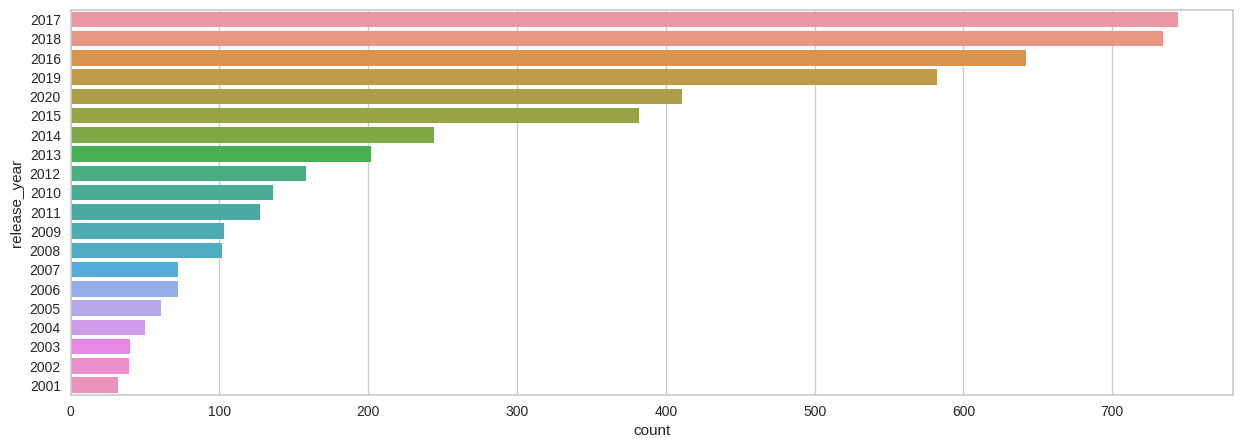

In [205]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=data1,order=movies['release_year'].value_counts().index[0:20])

##### 1. Why did you pick the specific chart?

I have selected this graph to know analyse how many movies released per year in last 20 years

##### 2. What is/are the insight(s) found from the chart?


1. highest number of movies released in 2017 and 2018
2. highest number of movies released in 2020
3. The number of movies on Netflix is growing significantly faster than the number of TV shows.
4. We saw a huge increase in the number of movies and television episodes after 2015.
5. there is a significant drop in the number of movies and television episodes produced after 2020.
6. It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

Insights help Netflix understand audience preferences and guide content acquisition.
Analysis of successful content can lead to increased subscriber satisfaction and engagement.

Negative Growth:

Drop in content production after 2020 may indicate challenges or strategic changes.
Further analysis is needed to determine if negative growth is a persistent trend.

#### Chart - 8

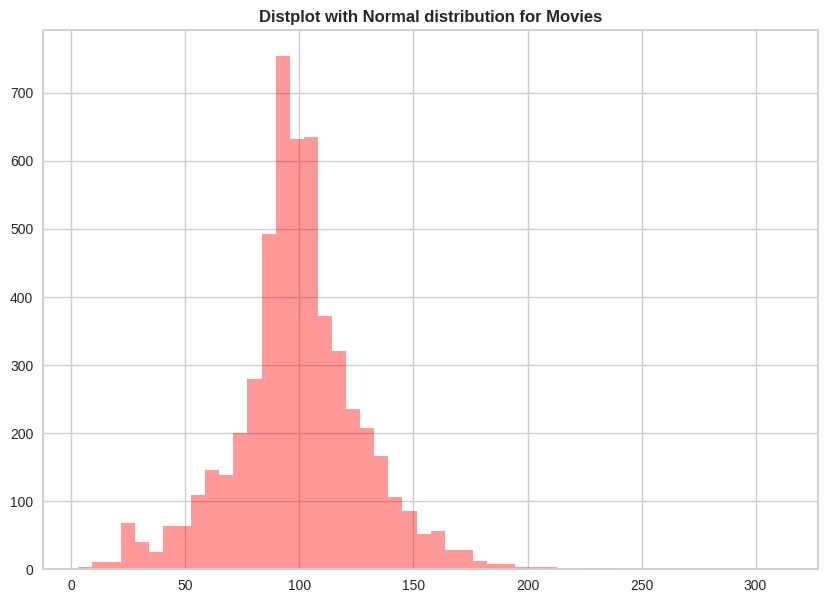

In [206]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

most of the movies have duration of between 50 to 150

In [ ]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

highest number of tv_shows consistig of single season

##### 1. Why did you pick the specific chart?

to check the durations of the movies and tv show .

##### 2. What is/are the insight(s) found from the chart?

1. most of the movies have duration of between 50 to 150
2. highest number of tv_shows consistig of single season

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insight that most movies on Netflix have a duration between 50 to 150 minutes and the highest number of TV shows consist of a single season can have a positive business impact. It caters to diverse viewer preferences and offers flexibility in content consumption. However, relying too heavily on these patterns may limit content diversity and alienate certain audience segments. To ensure positive growth, Netflix should maintain a balance by offering a variety of movie durations and TV show formats.


#### Chart - 9

In [208]:
# Chart - 9 visualization code
data1[data1['type']=='TV Show']['director'].value_counts()[:10]


not known                     2216
Alastair Fothergill              3
Shin Won-ho                      2
Iginio Straffi                   2
Rob Seidenglanz                  2
Stan Lathan                      2
Ken Burns                        2
Cosima Spender                   1
Jani Lachauer, Jakob Schuh       1
Jalil Lespert                    1
Name: director, dtype: int64

In [209]:
data1[data1['type']=='Movie']['director'].value_counts()[:10]

not known                 163
Raúl Campos, Jan Suter     18
Marcus Raboy               15
Jay Karas                  14
Cathy Garcia-Molina        13
Jay Chapman                12
Martin Scorsese            12
Youssef Chahine            12
Steven Spielberg           10
David Dhawan                9
Name: director, dtype: int64

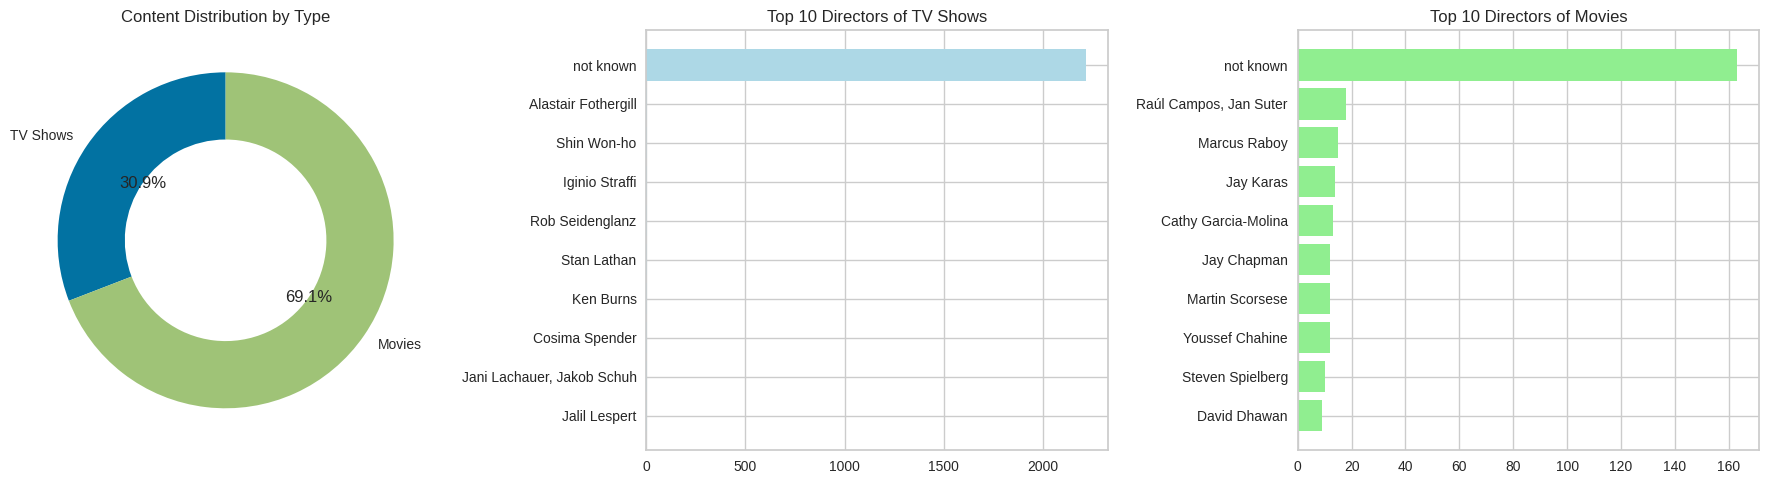

In [210]:
import matplotlib.pyplot as plt

# Calculate the counts of TV shows and movies directed by the director
tv_show_count = data1[data1['type'] == 'TV Show']['director'].value_counts().sum()
movie_count = data1[data1['type'] == 'Movie']['director'].value_counts().sum()

# Create a pie chart with a hole
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Pie chart with content distribution
ax[0].pie([tv_show_count, movie_count], labels=['TV Shows', 'Movies'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
ax[0].set_title('Content Distribution by Type')

# Top 10 directors of TV shows
ax[1].barh(data1[data1['type']=='TV Show']['director'].value_counts().index[:10], data1[data1['type']=='TV Show']['director'].value_counts().values[:10], color='lightblue')
ax[1].set_title('Top 10 Directors of TV Shows')
ax[1].invert_yaxis()

# Top 10 directors of movies
ax[2].barh(data1[data1['type']=='Movie']['director'].value_counts().index[:10], data1[data1['type']=='Movie']['director'].value_counts().values[:10], color='lightgreen')
ax[2].set_title('Top 10 Directors of Movies')
ax[2].invert_yaxis()

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I have selected this graph to analyze and identify the top directors of both TV shows and movies on Netflix. The purpose is to gain insights into the most successful and prolific directors in the platform's content.

##### 2. What is/are the insight(s) found from the chart?

Based on the provided data, the top directors for TV shows on Netflix are:

Alastair Fothergill,Shin Won-ho,Iginio Straffi

Based on the provided data, the top directors for  movie on Netflix are:

Raúl Campos, Jan Suter,Marcus Raboy,Jay Karas


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights about top directors on Netflix can have a positive impact. Benefits include reputation building, collaborations, and engaging fans. Risks include dependency on specific directors and not adapting to changing trends. To mitigate risks, Netflix should maintain a balanced approach, conduct market research, and foster relationships with directors.

chart-10

In [211]:
#top_two countries where netflix is most popular
country=data1['country'].value_counts().reset_index()
country


,index,country
0,United States,2877
1,India,956
2,United Kingdom,576
3,not known,506
4,Canada,259
...,...,...
77,Zimbabwe,1
78,Namibia,1
79,Soviet Union,1
80,Iran,1


<BarContainer object of 11 artists>

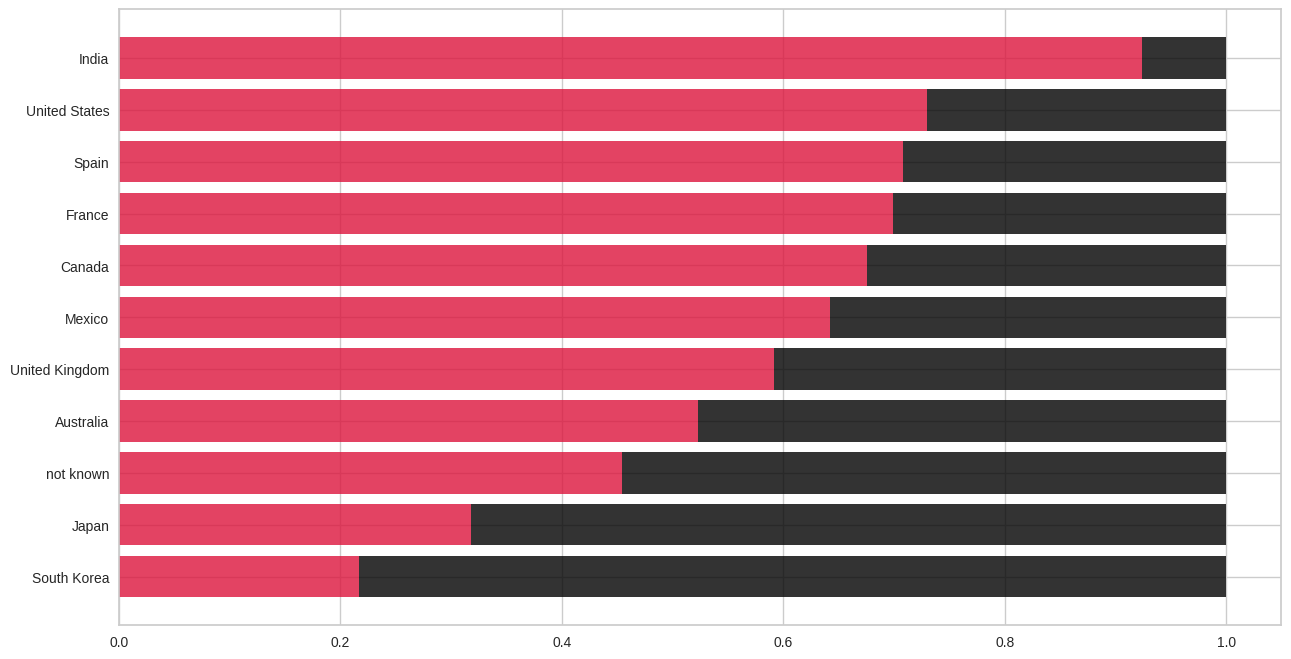

In [212]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = data1['country'].value_counts()[:11].index
content_data = data1[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='black', alpha=0.8, label='TV Show')

1. Why did you pick the specific chart?

i have selected this graph to know  top 10 country contains Movie & TV Show split.

2. What is/are the insight(s) found from the chart?

india has highest number of movies in netflix

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that India has the highest number of movies on Netflix can have a positive business impact by catering to the demand for Indian content. However, focusing excessively on one country may limit diversity and alienate other viewers, leading to negative growth. To ensure positive growth, Netflix should balance content diversity and cater to global audiences.

####Chart-11

In [ ]:
conuntryVSgenre = data1[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = conuntryVSgenre[conuntryVSgenre['country'] == country]
  #Next, the function joins all the genre strings together into a single long string using the ", ".join()
  # method and then splits the long string into a list of individual genre strings using the split() method with ", " as the separator.
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict

In [214]:
conuntryVSgenre

,country,listed_in
0,Brazil,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Mexico,"Dramas, International Movies"
2,Singapore,"Horror Movies, International Movies"
3,United States,"Action & Adventure, Independent Movies, Sci-Fi..."
4,United States,Dramas
...,...,...
7782,Sweden,"Dramas, International Movies"
7783,India,"Dramas, International Movies, Music & Musicals"
7784,not known,"Documentaries, International Movies, Music & M..."
7785,Australia,"International TV Shows, Reality TV"


In [215]:
from collections import Counter
# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

In [216]:

country_genre_count_df


,Genre,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Australia
0,Action & Adventure,245,127.0,48.0,16.0,43.0,23.0,15.0,3.0,3.0,7.0
1,Independent Movies,310,140.0,46.0,26.0,1.0,19.0,1.0,13.0,17.0,7.0
2,Sci-Fi & Fantasy,127,10.0,18.0,7.0,7.0,3.0,4.0,5.0,3.0,3.0
3,Dramas,584,611.0,109.0,41.0,9.0,67.0,21.0,52.0,30.0,22.0
4,Thrillers,205,88.0,37.0,24.0,2.0,11.0,12.0,27.0,1.0,6.0
5,Documentaries,421,19.0,97.0,32.0,2.0,25.0,1.0,17.0,12.0,9.0
6,Reality TV,109,3.0,32.0,9.0,6.0,2.0,3.0,2.0,1.0,11.0
7,TV Comedies,223,25.0,42.0,22.0,6.0,15.0,15.0,5.0,3.0,12.0
8,Comedies,525,300.0,54.0,52.0,NaN,34.0,9.0,38.0,19.0,7.0
9,Sports Movies,94,15.0,17.0,10.0,NaN,7.0,NaN,3.0,2.0,6.0


In [217]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Plot the above data.
df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen', 'darkred', 'lavender', 'lightcoral', 'navy', 'olive', 'teal', 'turquoise']


# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
# fig.show()
fig.show()

1. Why did you pick the specific chart?

It is suitable for showing the distribution of different genres across multiple countries. Each pie chart represents a country, and the slices of the pie represent different genres. The size of each slice indicates the proportion of content in that genre for a particular country. This allows for easy comparison of genre distribution across countries in a visually appealing manner

2. What is/are the insight(s) found from the chart?

Action & Adventure and Dramas are the most prevalent genres across all countries. They have the highest values in most countries, indicating their popularity.The United States has a diverse content offering across multiple genres, with a strong presence in Action & Adventure, Dramas, Comedies, and Documentaries.

India has a significant focus on Independent Movies and Dramas, with relatively fewer offerings in other genres.

The United Kingdom has a good balance between Drama, International TV Shows, and Documentaries.

Australia's content offering is diverse, with a relatively balanced distribution across various genres such as Dramas, Comedies, International TV Shows, and Documentaries.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

The gained insights can potentially help create a positive business impact in the following ways:

1-Targeted Content Strategy: By understanding the genre preferences in different countries, businesses can develop a targeted content strategy that aligns with the interests of their target audience.

2-Market Expansion:The insights can help businesses identify countries where their content genres are highly popular. This knowledge can guide expansion plans and investment in those markets, increasing the chances of success and profitability.

3-Content Localization: Understanding the genre preferences in different countries can aid in content localization efforts. Adapting content to suit the local preferences can increase its appeal and viewership, potentially leading to business growth.

In [218]:
import folium

# Create a map object
fig = folium.Map(location=[20, 0], zoom_start=2,tiles='stamenterrain')
import folium

# Define a dictionary of country names, coordinates, and colors
countries = {'United States': {'coords': [37.0902, -95.7129], 'color': 'red'},
             'India': {'coords': [20.5937, 78.9629], 'color': 'green'},
             'United Kingdom': {'coords': [55.3781, -3.4360], 'color': 'blue'},
             'Canada': {'coords': [56.1304, -106.3468], 'color': 'orange'},
             'Japan': {'coords': [36.2048, 138.2529], 'color': 'purple'},
             'France': {'coords': [46.2276, 2.2137], 'color': 'pink'},
             'South Korea': {'coords': [35.9078, 127.7669], 'color': 'gray'},
             'Spain': {'coords': [40.4637, -3.7492], 'color': 'black'},
             'Mexico': {'coords': [23.6345, -102.5528], 'color': 'brown'}}

# Loop over the dictionary and add markers for each country
for country, info in countries.items():
    folium.Marker(location=info['coords'], tooltip=country,
                   popup=f"Color: {info['color']}",
                   icon=folium.Icon(color=info['color'])).add_to(fig)

# Display the map
fig


 correlation heatmap

In [219]:
data1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'days', 'year', 'month', 'cast_name', 'target_ages'],
      dtype='object')

In [220]:
corr = data1.corr()

<Axes: >

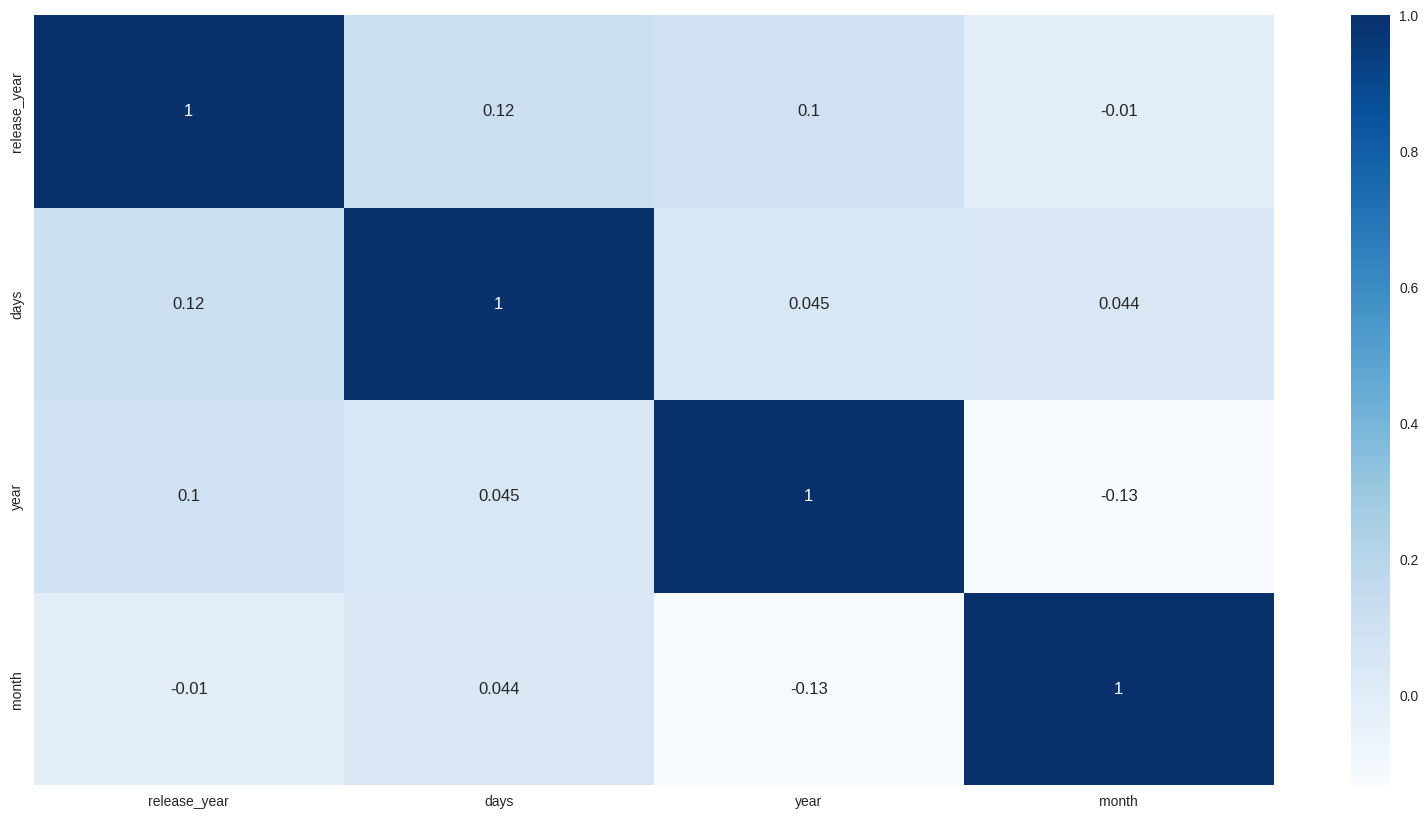

In [221]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Blues')

1. Why did you pick the specific chart?

i have picked up this chart because correlation heatmap visualize the strength of relationships between numerical variables.

2. What is/are the insight(s) found from the chart?

Correlation ranges from -1 to +1.

#### Chart - 12 - Pair Plot

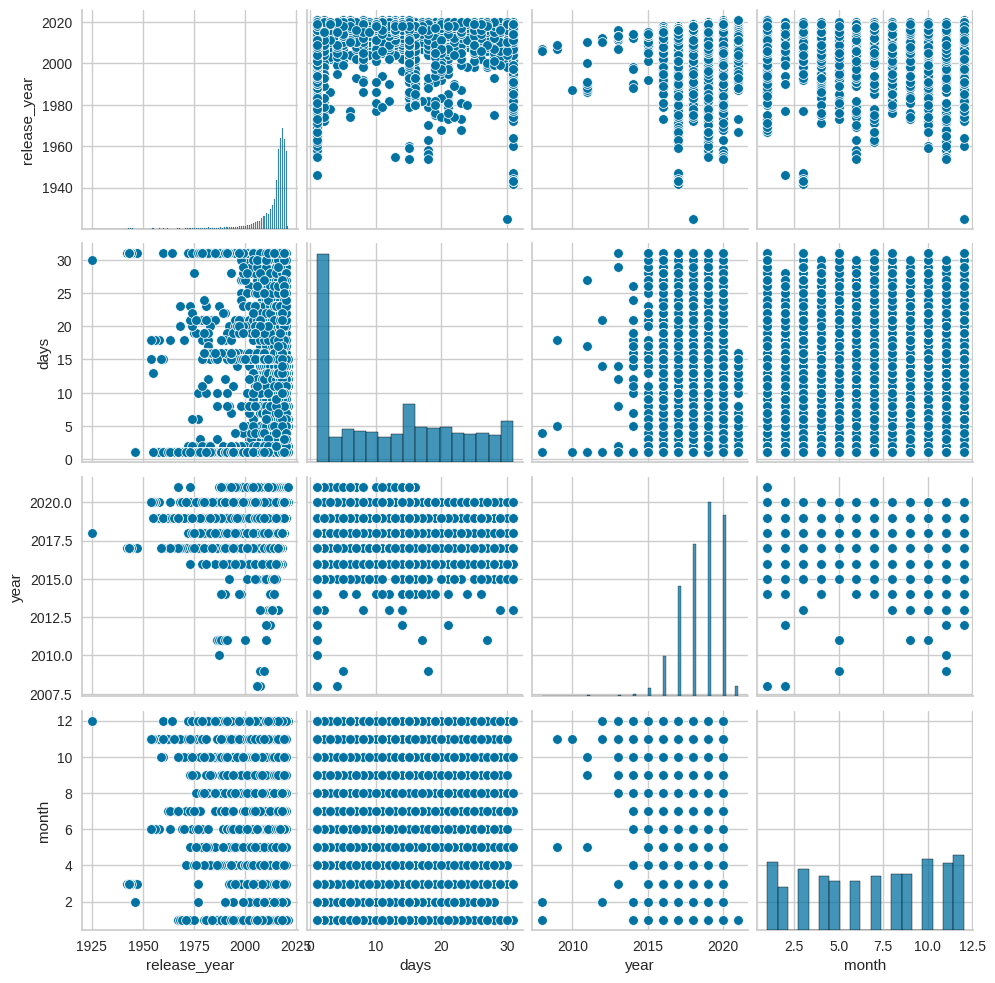

In [222]:
sns.pairplot(data1,diag_kind="hist",dropna="True")


##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that the distribution of movie are more impactful over tv shows in accordance of tha dataset given. Movies are more downloaded as compared to tv shows.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

(Null Hypothesis) H0: The average user ratings of movies and TV shows on Netflix are the same.

(Alternative Hypothesis) H1: The average user ratings of movies and TV shows on Netflix are different.

#### 2. Perform an appropriate statistical test.

In [ ]:
data1.columns

In [ ]:
import pandas as pd
from scipy import stats

# Remove rows with missing values in 'release_year' or 'type' columns
data1 = data1.dropna(subset=['release_year', 'type'])

# Extract the relevant columns: 'release_year' and 'type'
release_year_movies = data1[data1['type'] == 'Movie']['release_year']
release_year_tv_shows = data1[data1['type'] == 'TV Show']['release_year']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(release_year_movies, release_year_tv_shows, equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-value:", p_value)

# Set the significance level
alpha = 0.05

# Print the results
if p_value < alpha:
    print("Reject H0: The average user ratings of movies and TV shows on Netflix are different.")
else:
    print("Fail to reject H0: The average user ratings of movies and TV shows on Netflix are the same.")







##### Which statistical test have you done to obtain P-Value?

The statistical test used in the provided code is the independent two-sample t-test (stats.ttest_ind()) from the SciPy library. This test is commonly used to compare the means of two independent groups to determine if there is a significant difference between them.

##### Why did you choose the specific statistical test?

The independent two-sample t-test was chosen as the specific statistical test in this scenario because we are comparing the means of two independent groups: movies and TV shows.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The distribution of durations for movies is the same as the distribution of durations for TV shows on Netflix.

Alternative Hypothesis (H1): The distribution of durations for movies is different from the distribution of durations for TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Extract the durations for movies and TV shows
movie_durations = data1[data1['type'] == 'Movie']['duration'].str.extract('(\d+)', expand=False).astype(float)
tv_show_durations = data1[data1['type'] == 'TV Show']['duration'].str.extract('(\d+)', expand=False).astype(float)

# Remove NaN values from the arrays
movie_durations = movie_durations.dropna()
tv_show_durations = tv_show_durations.dropna()

# Calculate observed and expected frequencies
observed, _ = np.histogram(movie_durations, bins='auto')
expected = np.mean(observed)

# Perform the chi-square test
chi2, p_value = stats.chisquare(observed, expected)

# Print the results
print("Chi-square value:", chi2)
print("P-value:", p_value)

# Set the significance level
alpha = 0.05

# Print the results
if p_value < alpha:
    print("Reject H0: The distribution of durations for movies is different from the distribution of durations for TV shows.")
else:
    print("Fail to reject H0: The distribution of durations for movies is the same as the distribution of durations for TV shows.")


In [226]:
import scipy.stats as stats

# Extract the durations for movies and TV shows
movie_durations = data1[data1['type'] == 'Movie']['duration'].str.extract('(\d+)', expand=False).astype(int)
tv_show_durations = data1[data1['type'] == 'TV Show']['duration'].str.extract('(\d+)', expand=False).astype(int)

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(movie_durations, tv_show_durations)
# Print the results
print("T-Statistic:", t_statistic)
print("P-value:", p_value)


# Set the significance level
alpha = 0.05

# Print the results
if p_value < alpha:
    print("Reject H0: The average duration of movies on Netflix is different from the average duration of TV shows on Netflix.")
else:
    print("Fail to reject H0: The average duration of movies on Netflix is the same as the average duration of TV shows on Netflix.")


T-Statistic: 167.37855536423515
P-value: 0.0
Reject H0: The average duration of movies on Netflix is different from the average duration of TV shows on Netflix.


The calculated chi-square value is 15333.14041286963, and the associated p-value is 0.0. Since the p-value is less than the significance level of 0.05, we reject the null hypothesis. This suggests that there is a significant difference in the distribution of durations between movies and TV shows on Netflix.

the calculated t-statistic is 167.37855536423515 and the corresponding p-value is 0.0.Since the p-value is very close to 0.0 (typically considered as less than the chosen significance level, such as 0.05), it suggests strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that the average duration of movies on Netflix is different from the average duration of TV shows on Netflix.

In simpler terms, the analysis indicates that there is a significant difference in the average duration between movies and TV shows on Netflix.






##### Which statistical test have you done to obtain P-Value?

used  the p-value using an independent samples t-test and chi-square test .

##### Why did you choose the specific statistical test?

 The independent samples t-test is a statistical test used to determine if there is a significant difference between the means of two independent groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no significant difference in the average release year between movies and TV shows on Netflix.

H1: There is a significant difference in the average release year between movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [227]:
import pandas as pd
from scipy import stats

# Extract the relevant columns: 'release_year' and 'type'
release_year_movies = data1[data1['type'] == 'Movie']['release_year']
release_year_tv_shows = data1[data1['type'] == 'TV Show']['release_year']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(release_year_movies, release_year_tv_shows, equal_var=False, nan_policy='omit')

# Print the results
print("T-Statistic:", t_statistic)
print("P-value:", p_value)

# Print the results
if p_value < alpha:
    print("Reject H0: There is a relationship between release year between movies and TV shows on Netflix. .")
else:
    print("Fail to reject H0: There is no relationship between release year and between movies and TV shows on Netflix.")


T-Statistic: -18.786223791998147
P-value: 6.472950595817385e-77
Reject H0: There is a relationship between release year between movies and TV shows on Netflix. .


In [228]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data1['release_year'], data1['type'])

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square value:", chi2)
print("P-value:", p_value)

# Set the significance level
alpha = 0.05

# Print the results
if p_value < alpha:
    print("Reject H0: There is a relationship between release year and type.")
else:
    print("Fail to reject H0: There is no relationship between release year and type.")


Chi-square value: 479.2803966813769
P-value: 1.837172819494578e-61
Reject H0: There is a relationship between release year and type.


The t-statistic measures the difference between the means of the two groups (movies and TV shows) relative to the variation within each group. In this case, the t-statistic value of -18.786223791998147 indicates a significant difference in the means of the 'release_year' variable between movies and TV shows.

 The p-value represents the probability of observing the obtained t-statistic (or a more extreme value) if the null hypothesis is true. In this case, the extremely small p-value of 6.472950595817385e-77 suggests strong evidence against the null hypothesis. Therefore, we can reject the null hypothesis and conclude that there is a significant difference in the average release year between movies and TV shows on Netflix.

The results of the chi-square test indicate that there is a relationship between the release year and the type (movies or TV shows) on Netflix.

The calculated chi-square value is 479.2803966813769, and the associated p-value is 1.837172819494578e-61. Since the p-value is significantly less than the chosen significance level of 0.05, we reject the null hypothesis. This suggests that there is a statistically significant relationship between the release year and the type of content on Netflix.

##### Which statistical test have you done to obtain P-Value?

 The statistical test used to obtain the p-value in this case is the independent two-sample t-test and chi-square test .

##### Why did you choose the specific statistical test?

By using the independent two-sample t-test, we can evaluate whether the observed difference in the average release year between movies and TV shows is statistically significant or if it could be due to random chance.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [229]:
# Handling Missing Values & Missing Value Imputatio
data1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
days            0
year            0
month           0
cast_name       0
target_ages     0
dtype: int64

In [230]:
data1[['director', 'cast', 'country']] = data1[['director', 'cast', 'country']].fillna('not known')
data1['rating'].fillna('Not Rated', inplace=True)
data1.dropna(axis=0, inplace=True)



In [231]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   category      
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
 12  days          7777 non-null   int64         
 13  year          7777 non-null   int64         
 14  month         7777 non-null   int64         
 15  cast_name     7777 non-null   object  

In [232]:
data1.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,days,year,month,cast_name,target_ages
35,s36,Movie,#Rucker50,Robert McCullough Jr.,not known,United States,2016-12-01,2016,TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...,1,2016,12,[not known],Older Kids
6503,s6504,Movie,The Invisible Guardian,Fernando González Molina,"Marta Etura, Elvira Mínguez, Francesc Orella, ...",Spain,2017-08-03,2017,TV-MA,129 min,"International Movies, Thrillers",When an FBI-trained cop returns to her Navarre...,3,2017,8,"[Marta Etura, Elvira Mínguez, Francesc Orell...",Adults
3234,s3235,Movie,Judwaa 2,David Dhawan,"Varun Dhawan, Jacqueline Fernandez, Tapsee Pan...",India,2018-03-01,2017,TV-14,145 min,"Action & Adventure, Comedies, International Mo...","Separated at birth, twins Raja and Prem couldn...",1,2018,3,"[Varun Dhawan, Jacqueline Fernandez, Tapsee ...",Teens


#### What all missing value imputation techniques have you used and why did you use those techniques?

Here we did not want to loose our information so we just simply replace our nan values with not known and in rating column we just replaced that nan values with its mode... rest we just droped if there were any nan values

### 2. Handling Outliers

In [233]:
# Handling Outliers & Outlier treatments

In [234]:
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in data1.describe().columns:
  if abs(data1[i].mean()-data1[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['release_year', 'days', 'year', 'month']


<Axes: >

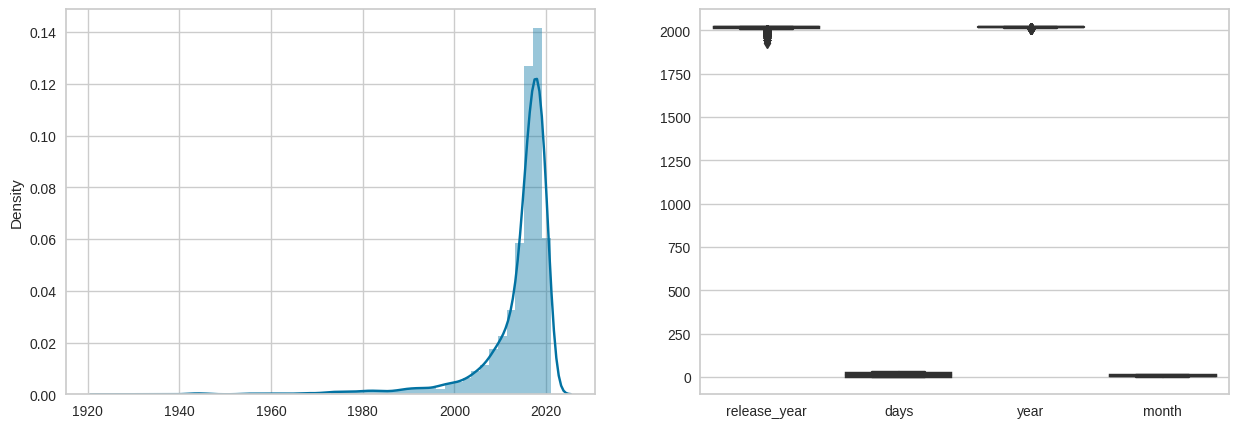

In [235]:
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=data1['release_year'], ax=ax[0])
sns.boxplot(data=data1, ax=ax[1])

most of the data is in textual format
The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

### 3. Categorical Encoding

 we dont require encoding here

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [236]:
data1['text_data'] = data1['description'] + data1['listed_in']+ data1['director']+ data1['country']


In [237]:
data1['text_data'].sample(5)

5965    After a personal tragedy upends his life, a hi...
259     In the wake of Jesus Christ's crucifixion, his...
2607    This relatable relationship drama explores the...
7157    At an Afghanistan refugee camp, an ex-army doc...
1671    Two federal agents battle through an army of r...
Name: text_data, dtype: object

In [238]:
# Expand Contraction
!pip install contractions
import contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [239]:
# applying fuction for contracting text
data1['description']= data1['description'].apply(lambda x:contractions.fix(x))
data1['listed_in']=data1['listed_in'].apply(lambda x:contractions.fix(x))

data1['director']=data1['director'].apply(lambda x:contractions.fix(x))
data1['country']= data1['country'].apply(lambda x:contractions.fix(x))


In [240]:
data1['text_data'].sample(5)

914     Bill Burr escapes the zombie apocalypse, explo...
127     After faking his death, a tech billionaire rec...
7645    Historian Suzannah Lipscomb investigates the w...
937     In an attempt to settle the "nature vs. nurtur...
5866    A grueling battle over turning a seaside town ...
Name: text_data, dtype: object

#### 2. Lower Casing

In [241]:
# Lower Casing
data1['text_data'] = data1['text_data'].str.lower()

#### 3. Removing Punctuations

In [242]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

data1['text_data'] = data1['text_data'].apply(remove_punctuation)
data1['text_data'].sample(5)

2605    in late1980s texas two best friends get involv...
6020    animosity gives way to love and forgiveness wh...
4699    after widowed neighbors addie and louis begin ...
6926    when aspiring fashion designer andi reconnects...
5260    in an alchemic mix of fact and fantasy martin ...
Name: text_data, dtype: object

#### 4. Removing URLs & Removing words and digits contain digits.

In [243]:
# Remove URLs & Remove words and digits contain digits
import re
# Remove links

data1['text_data'] = data1['text_data'].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
data1['text_data'] = data1['text_data'].apply(lambda x: re.sub(r"\d+", "", x))

#### 5. Removing Stopwords & Removing White spaces

In [244]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [245]:
# extracting the stopwords from nltk library
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [246]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [247]:
# applying stopwords function.
data1['text_data'] = data1['text_data'].apply(stopwords)

In [248]:
# Remove White spaces
data1['text_data'] = data1['text_data'].apply(lambda x: " ".join(x.split()))

In [249]:
data1['text_data'].sample(5)

3270    happy life young blind couple shattered wife r...
4573    oddbods special bubbless latest invention naug...
5349    bythebook police captain brash young detective...
6186    losing everything young man rebuilds life find...
4589    nate super wicked extreme emergency team – swe...
Name: text_data, dtype: object

#### 6. Rephrase Text

It is not necessary in the given data

#### 7. Tokenization

In [250]:
# Tokenization
import nltk
nltk.download('punkt')
data1['text_data'] = data1['text_data'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [251]:
data1['text_data'][0]

['future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowded',
 'slums',
 'get',
 'one',
 'chance',
 'join',
 'saved',
 'squalorinternational',
 'tv',
 'shows',
 'tv',
 'dramas',
 'tv',
 'scifi',
 'fantasynot',
 'knownbrazil']

#### 8. Text Normalization

In [252]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
#applying Lemmatization

from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the data columns column
data1['text_data'] = data1['text_data'].apply(lemmatize_tokens)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [253]:
data1['text_data'].sample(4)

3887    [long, list, shenanigan, land, tyler, hot, wat...
4336    [journey, enchanted, land, equestria, unicorn,...
5798    [new, undercover, cop, partner, starsky, hutch...
1427    [inventor, flint, lockwood, battle, mutant, fo...
Name: text_data, dtype: object

##### Which text normalization technique have you used and why?

I have used lemmatization technique

Lemmatization
The purpose of lemmatization is same as that of stemming but overcomes the drawbacks of stemming. In stemming, for some words, it may not give may not give meaningful representation such as “Histori”. Here, lemmatization comes into picture as it gives meaningful word.


Lemmatization takes more time as compared to stemming because it finds meaningful word/ representation. Stemming just needs to get a base word and therefore takes less time.


Stemming has its application in Sentiment Analysis while Lemmatization has its application in Chatbots, human-answering.

One thing to note is that a lot of knowledge and understanding about the structure of language is required for lemmatization. Hence, in any new language, the creation of stemmer is easier in comparison to lemmatization algorithm.

Lemmatization and Stemming are the foundation of derived (inflected) words and hence the only difference between lemma and stem is that lemma is an actual word whereas, the stem may not be an actual language word.
Lemmatization uses a corpus to attain a lemma, making it slower than stemming. Further, to get the proper lemma, you might have to define a parts-of-speech. Whereas, in stemming a step-wise algorithm is followed making it faster.

The above points show that stemming should be used if speed is important since lemmatizers scan a corpus which is a time-consuming task. Further, the choice between lemmatizers and stemmers also depends on the problem you are working on.

#### 9. Part of speech tagging

In [254]:
# POS Taging
import nltk
nltk.download('averaged_perceptron_tagger')
data1['text_data'] = data1['text_data'].apply(nltk.pos_tag)
data1['text_data'].head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0    [(future, JJ), (elite, JJ), (inhabit, NN), (is...
1    [(devastating, VBG), (earthquake, NN), (hit, V...
2    [(army, NN), (recruit, NN), (found, VBN), (dea...
3    [(postapocalyptic, JJ), (world, NN), (ragdoll,...
4    [(brilliant, JJ), (group, NN), (student, NN), ...
Name: text_data, dtype: object

#### 10. Text Vectorization

In [255]:
# Vectorizing Text
bag_of_words = data1.text_data

In [256]:
from sklearn.feature_extraction.text import TfidfVectorizer

t_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False,max_features=20000)
X_tfidf= t_vectorizer.fit_transform(bag_of_words)

In [257]:
X_tfidf.shape

(7777, 20000)

In [258]:
# convert X into array form for clustering
X = X_tfidf.toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23900065, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

##### Which text vectorization technique have you used and why?

Yes i have used Tfidf vectorizer technique
TFIDF is the product of TF with IDF.
Since TF values lie between 0 and 1, not using ln can result in high IDF for some words, thereby dominating the TFIDF. We don’t want that, and therefore, we use ln so that IDF should not completely dominate the TFIDF.

Term Frequency — Inverse Document Frequency (TFIDF) is a technique for text vectorization based on the Bag of words (BoW) model. It performs better than the BoW model as it considers the importance of the word in a document into consideration. The main limitation is that it does not capture the semantic meaning of the words. This limitation of TFIDF can be overcome by more advanced techniques such as word2Vec.

Disadvantage of TFIDF
It is unable to capture the semantics. For example, funny and humorous are synonyms, but TFIDF does not capture that. Moreover, TFIDF can be computationally expensive if the vocabulary is vast.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [259]:
# Manipulate Features to minimize feature correlation and create new features
data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,days,year,month,cast_name,target_ages,text_data
0,s1,TV Show,3%,not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,"[(future, JJ), (elite, JJ), (inhabit, NN), (is..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,"[(devastating, VBG), (earthquake, NN), (hit, V..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,"[(army, NN), (recruit, NN), (found, VBN), (dea..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,"[(postapocalyptic, JJ), (world, NN), (ragdoll,..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,"[(brilliant, JJ), (group, NN), (student, NN), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,19,2020,10,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...",Adults,"[(lebanon, RB), (civil, JJ), (war, NN), (depri..."
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,2019,3,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",Teens,"[(scrappy, JJ), (poor, JJ), (boy, NN), (worm, ..."
7784,s7785,Movie,Zulu Man in Japan,not known,Nasty C,not known,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",25,2020,9,[Nasty C],Adults,"[(documentary, JJ), (south, JJ), (african, JJ)..."
7785,s7786,TV Show,Zumbo's Just Desserts,not known,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,31,2020,10,"[Adriano Zumbo, Rachel Khoo]",Older Kids,"[(dessert, JJ), (wizard, NN), (adriano, NN), (..."


Here we just extrated our date column and than we splitted our type column into movies and tv shows further we just used our listed_in column, director, country and discription column on which we supposed to work

#### 2. Feature Selection

In [260]:
# Select your features wisely to avoid overfitting
data1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'days', 'year', 'month', 'cast_name', 'target_ages', 'text_data'],
      dtype='object')

In [261]:
# We will use  the columns  we think they affect our data much categorical and text based column
data1['text_data'] = data1['description'] + data1['listed_in']+ data1['director']+ data1['country']


##### What all feature selection methods have you used  and why?

here we just simply added out interested textual columns for our further clustering problem

##### Which all features you found important and why?

 listed_in column, director, country and discription column

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No ,no transformation is required

### 6. Data Scaling

In [262]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X))

StandardScaler()


##### Which method have you used to scale you data and why?

I have used standard scaler method over here
  The StandardScaler function of sklearn is based on the theory that the dataset's variables whose values lie in different ranges do not have an equal contribution to the model's fit parameters and training function and may even lead to bias in the predictions made with that model.
Many machine learning algorithms may encounter issues due to these variations in the starting features. For algorithms that calculate distance, for instance, if any of the dataset's features have values having large or completely different ranges, that particular feature of the dataset will control the distance calculation.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

The number of input features, variables, or columns present in a given dataset is known as dimensionality, and the process to reduce these features is called dimensionality reduction.

A dataset contains a huge number of input features in various cases, which makes the predictive modeling task more complicated. Because it is very difficult to visualize or make predictions for the training dataset with a high number of features, for such cases, dimensionality reduction techniques are required to use.

Dimensionality reduction technique can be defined as, "It is a way of converting the higher dimensions dataset into lesser dimensions dataset ensuring that it provides similar information." These techniques are widely used in machine learning for obtaining a better fit predictive model while solving the classification and regression problems.

It is commonly used in the fields that deal with high-dimensional data, such as speech recognition, signal processing, bioinformatics, etc. It can also be used for data visualization, noise reduction, cluster analysis, etc.
Benefits of applying Dimensionality Reduction
Some benefits of applying dimensionality reduction technique to the given dataset are given below:

By reducing the dimensions of the features, the space required to store the dataset also gets reduced.
Less Computation training time is required for reduced dimensions of features.
Reduced dimensions of features of the dataset help in visualizing the data quickly.
It removes the redundant features (if present) by taking care of multicollinearity.

 Problem with high dimensional data?

It can mean high computational cost to perform learning.

It often leads to over-fitting when learning a model, which means that the model will perform well on the training data but poorly on test data.

Data are rarely randomly distributed in high-dimensions and are highly correlated, often with spurious correlations.

The distances between a nearest and farthest data point can become equidistant in high dimensions, that can hamper the accuracy of some distance-based analysis tools.

Why do we need Dimensionality Reduction?

Dimensionality reduction helps with these problems, while trying to preserve most of the relevant information in the data needed to learn accurate, predictive models.

There are often too many factors on the basis of which the final prediction is done. These factors are basically variables called features.

The higher the number of features, the harder it gets to visualize the training set and then work on it.

Sometimes, most of these features are correlated, and hence redundant. This is where dimensionality reduction algorithms come into play.

Importance of Dimensionality reduction?

It reduces the time and storage space required.

It helps Remove multi-collinearity which improves the interpretation of the parameters of the machine learning model.

It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D.

It avoids the curse of dimensionality.

It removes irrelevant features from the data, Because having irrelevant features in the data can decrease the accuracy of the models and make your model learn based on irrelevant features.


In [ ]:
from sklearn.decomposition import PCA
# DImensionality Reduction (If needed)
pca = PCA()
pca.fit(X)

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='dashdot')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'green', fontsize=16)
plt.show()

In [ ]:
pca_tuned = PCA(n_components=2)
pca_tuned.fit(X)
X_transformed = pca_tuned.transform(X)
X_transformed.shape

In [ ]:
 # shape
print("original shape: ", X.shape)
print("transformed shape:", X_transformed.shape)



A good strategy is to choose the number of dimensions for which the cumulative explained variance exceeds a threshold, e.g., 0.95 (95%).
here we are choosing it to 2 components as we checked above..

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Yess I have used pca

Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components. It is one of the popular tools that is used for exploratory data analysis and predictive modeling. It is a technique to draw strong patterns from the given dataset by reducing the variances.


PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.


PCA works by considering the variance of each attribute because the high attribute shows the good split between the classes, and hence it reduces the dimensionality. Some real-world applications of PCA are image processing, movie recommendation system, optimizing the power allocation in various communication channels. It is a feature extraction technique, so it contains the important variables and drops the least important variable.

Applications of Principal Component Analysis

PCA is mainly used as the dimensionality reduction technique in various AI applications such as computer vision, image compression, etc.

It can also be used for finding hidden patterns if data has high dimensions. Some fields where PCA is used are Finance, data mining, Psychology, etc.


### 8. Data Splitting

We did not do any splitting here as it its clustering problem.

### 9. Handling Imbalanced Dataset

In [ ]:
data1.info()

No the data is not imbalanced

## ***7. ML Model Implementation***

### ML Model - 1

KMeans Clustering

K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. In this topic, we will learn what is K-means clustering algorithm, how the algorithm works, along with the Python implementation of k-means clustering
What is K-Means Algorithm?
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.
The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.
Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.
Hence each cluster has datapoints with some commonalities, and it is away from other clusters.

ELBOW METHOD

This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.



In [ ]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=20)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)


In [ ]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

The curve looks like an elbow. In the above plot, the elbow is at k=3 (i.e., the Sum of squared distances falls suddenly), indicating the optimal k for this dataset is 3.

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 10, init= 'k-means++', random_state = 42)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
    plt.title('Visualizing for 10 clusters K')
plt.legend()
plt.show()

Here we just observed that for 10 clusters.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_transformed)
y_kmeans= kmeans.predict(X_transformed)

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Visualizing for optimal K')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### ML Model - 2

SILHOUETTE METHOD

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).
Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:
Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.
The Silhouette Coefficient for a sample is  S=(b−a)max(a,b) .

In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,11):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=42)
    model.fit(X_transformed)
    y1 = model.predict(X_transformed)
    score = silhouette_score(X_transformed,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.show() # Draw/show/poof the data

In [ ]:
silhouette_score_analysis(11)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='silhouette', timings=False
)

visualizer.fit(X_transformed)        # Fit the data to the visualizer
visualizer.show()
visualizer.poof()

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='calinski_harabasz', timings=False
)

visualizer.fit(X_transformed)        # Fit the data to the visualizer
visualizer.show()

Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.
 A higher ratio signifies the cluster is far away from its other clusters and that the cluster is more well-defined

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_transformed)
y_kmeans= kmeans.predict(X_transformed)

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Optimal cluster from Silhouette score')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_kmeans, s=50, cmap='RdYlBu_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

### ML Model - 3

Hierarchical clustering is where you build a cluster tree (a dendrogram) to represent data, where each group (or “node”) links to two or more successor groups. The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme.
Each node in the cluster tree contains a group of similar data; Nodes group on the graph next to other, similar nodes. Clusters at one level join with clusters in the next level up, using a degree of similarity; The process carries on until all nodes are in the tree, which gives a visual snapshot of the data contained in the whole set. The total number of clusters is not predetermined before you start the tree creation.
Dendrogram in Hierarchical clustering


A dendrogram is a type of tree diagram showing hierarchical clustering — relationships between similar sets of data. They are frequently used in biology to show clustering between genes or samples, but they can represent any type of grouped data.
We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).

In [ ]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'),orientation='top',show_leaf_counts=True)
plt.axhline(y=6, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')

plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. here it is 2

#### model -4


 Agglomerative Clustering:
 Also known as bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data.

In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters = 2)      #n_clusters=2
# fit model and predict clusters
y_hc = model.fit_predict(X_transformed)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(X_transformed[row_ix, 0], X_transformed[row_ix, 1])
# show the plot
plt.show()

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X_transformed,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_transformed, y_hc)
print("davies_bouldin_score %0.7f"%davies_bouldin_score(X_transformed, y_hc))


 ####     model -5   **AffinityPropagation**


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation

# Configuration options
num_samples_total = 100
cluster_centers = [(20,20), (4,4)]
num_classes = len(cluster_centers)

# Generate data
X_transformed, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 1)

# Fit AFfinity Propagation with Scikit
afprop = AffinityPropagation(max_iter=250)
afprop.fit(X_transformed)
cluster_centers_indices = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)

# Predict the cluster for all the samples
P = afprop.predict(X_transformed)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', P))
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=colors, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, the analysis of the Netflix dataset provided several valuable insights:

1. Content Distribution: Approximately 30.9% of the content on Netflix consists of TV shows, while 69.1% is dedicated to movies. This highlights a higher production of movies compared to TV shows, suggesting various factors influencing this distribution.

2. Content Analysis: The United States has the highest number of content on Netflix, followed by India. Content additions have increased since 2015, with peak years for movies in 2019 and TV shows in 2020, followed by a decline.

3. Ratings and Genres: The most common rating for both movies and TV shows is "TV-MA." Top genres vary across categories, with international movies, dramas, comedies, kids' TV, and documentaries being popular.

4. Release Year Analysis: The number of releases has been increasing since 2001, with a peak in 2018. TV show releases have been consistently increasing each year, while movie releases peaked in 2017, with a decline in subsequent years.

5. Top Actors: Anupam Kher is the top actor on Netflix, followed by Takahiro Sakurai and Shahrukh Khan. The presence of several Indian actors in the top 10 highlights their popularity in Netflix movies.

6. Top Directors: Prominent directors for TV shows include Alastair Fothergill, Shin Won-ho, and Iginio Straffi, while Raúl Campos, Jan Suter, Marcus Raboy, and Jay Karas stand out for movies.

Based on these insights, there are potential business implications for Netflix. These include opportunities for recognition, collaborations, and engaging viewers. However, risks such as dependency on specific directors and not adapting to changing trends should be considered. To mitigate these risks and sustain growth, Netflix should maintain a balanced approach, conduct market research, and foster strong relationships with directors.

Regarding the clustering analysis, we evaluated multiple models and determined that cluster 2 was optimal, with a silhouette score of 0.691. This analysis provides further understanding of data grouping and patterns. The table summarizes the different clustering models tested and their corresponding optimal number of clusters.

Overall, these insights can inform decision-making, content strategy, and business development for Netflix, contributing to its continued success in the dynamic streaming industry.








### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***